# Research on Video Games Sales

There is the online store, which sells video games all over the world. 

User and expert reviews, genres, platforms, and historical data on game sales are available. 

The purpose of the study: to identify patterns that determine whether a game succeeds or not on a particular platform or region in order to spot potential big winners and plan advertising campaigns.

The Work Plan:

<a href='#section1'>1. Getting the data and study the general information</a>

<a href='#section2'>2. Data preprocessing</a>
* <a href='#section2.1'>2.1 Data Type and Feature Names Replacement</a>
* <a href='#section2.2'>2.2 Examing and Processing Missing Values</a>
* <a href='#section2.3'>2.3 Examing and Processing Duplicates</a>
* <a href='#section2.4'>2.4 Additional calculations</a>
* <a href='#section2.5'>2.5 Investigation of outliers</a>

<a href='#section3'>3. Exploratory Data Analysis</a>

<a href='#section4'>4. Creating a user profile for each region</a>

<a href='#section5'>5. Testing the hypotheses</a>

<a href='#section6'>6. Overall conclusion</a>

## 1. Getting the data and study the general information.
<a id='section1'></a>

In [1]:
#importing of libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

In [3]:
#reading file that contains the video games sells data  
games_data = pd.read_csv('/datasets/games.csv')

#looking at the data's general information. 
print(BOLD + 'General information:' + END)
print(games_data.info())
print()

#looking at the first few rows in a table
print(BOLD + 'The first few rows in a dataset:' + END)
display(games_data.head())

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

The first few rows in a dataset:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


*The table contains __16,715 rows__ for __11 features__.* 

*A pair of values are missing in the `'Name'` and `'Genre'` columns. Two and a half hundred values are missing in the `'Year_of_Release'` column. And half of values in the `'Critic_Score'`, `'User_Score'` and `'Rating'` columns are also missing.*

*For the columns `'Year_of_Release'` and `'Critic_Score'` __float64__ is used. It looks like these columns contain __integer__ values. For the columns `'User_Score'` __object__ is used. It seems it should be __numerical__ values.*

In [4]:
#Checking if 'Year_of_Release' and 'Critic_Score' have only integer values
print(BOLD + "Are all values of 'Year_of_Release' column integer?" + END)
print(games_data[games_data.Year_of_Release.notnull()].Year_of_Release.apply(float.is_integer).all())
print()
print(BOLD + "Are all values of 'Critic_Score' column integer?" + END)
print(games_data[games_data.Critic_Score.notnull()].Critic_Score.apply(float.is_integer).all())

Are all values of 'Year_of_Release' column integer?
True

Are all values of 'Critic_Score' column integer?
True


*__float64__ is excessive for `'Year_of_Release'` and `'Critic_Score'` columns, it would be enough __integer__ for them.*

In [5]:
#Let's look at numerical and categorical features in more detail
#creating the corresponding lists
numeric_cols = ['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']
categorical_cols = ['Platform', 'Genre', 'Rating', 'User_Score']

#function to find the minimum positive number in a series. 
def positive_min(series):
    return min([x for x in series.dropna() if x > 0])

#looking at the values that take numerical features 
print(BOLD + 'The values that take numerical features:' + END)
display(games_data[numeric_cols].agg(['min', positive_min, 'max', 'mean', 'median', 'std']).T)
print('\n')

#Let's look at the values that take categorical features 
print(BOLD + 'The number of different names of game:' + END, games_data.Name.nunique())
print()
print(BOLD + 'The values that take categorical features ' + END + "(except 'Name' feature):")
print(BOLD + "Rem.:" + END + "'User_Score' is assigned to categorical features to see why the type is object, " +\
          "although it should be a numerical type")
#for new version of pandas 
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', -1)
display(games_data[categorical_cols].sort_values('User_Score').agg(['unique', 'nunique']).T)

The values that take numerical features:


,min,positive_min,max,mean,median,std
Year_of_Release,1980.0,1980.00,2016.00,2006.484616,2007.00,5.877050
NA_sales,0.0,0.01,41.36,0.263377,0.08,0.813604
EU_sales,0.0,0.01,28.96,0.145060,0.02,0.503339
JP_sales,0.0,0.01,10.22,0.077617,0.00,0.308853
Other_sales,0.0,0.01,10.57,0.047342,0.01,0.186731
Critic_Score,13.0,13.00,98.00,68.967679,71.00,13.938165




The number of different names of game: 11559

The values that take categorical features (except 'Name' feature):
Rem.:'User_Score' is assigned to categorical features to see why the type is object, although it should be a numerical type


,unique,nunique
Platform,"[DS, Wii, PS3, XB, PSP, X360, PS, PC, GC, PS4, XOne, GBA, PS2, PSV, 3DS, WiiU, DC, NES, GB, SNES, N64, 2600, GEN, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX]",31
Genre,"[Adventure, Platform, Sports, Action, Racing, Misc, Strategy, Fighting, Puzzle, Shooter, Role-Playing, Simulation, nan]",12
Rating,"[E, T, E10+, M, nan, RP, EC, K-A, AO]",8
User_Score,"[0, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, tbd, nan]",96


*The dataset contains data on __11,559 video games__ released on __31 game platforms__ including a PC for 37 years from __1980__ to __2016__, with sales in the __North American__, __European__, __Japanese__, and other markets ranging __from \\$10,000 to \$10-40 million per game__. __On average__, game sales range __from \\$10,000 to \$80,000__, depending on the market.  The mean of sales is much greater than the median, this implies that there are outliers. But we shouldn't delete them, as games with huge sales values are bestsellers. There are no NaN values for sales, so zero value may correspond to the case when this version of the game was not released in a certain market.*

*The values of `'Critic_Score'` feature range __from 13 to 98 points__. Thus it would be enough int8 for it.*

*There are __12 game genres__ and a couple of unknown values for `'Genre'` column. There are __8 type of ESRB Ratings__. There are unknown values for `'Rating'` column.*

*The column `'User_Score'` contains, in addition to the numerical values and unknown values, the 'tbd' value.*

Histograms for numerical features


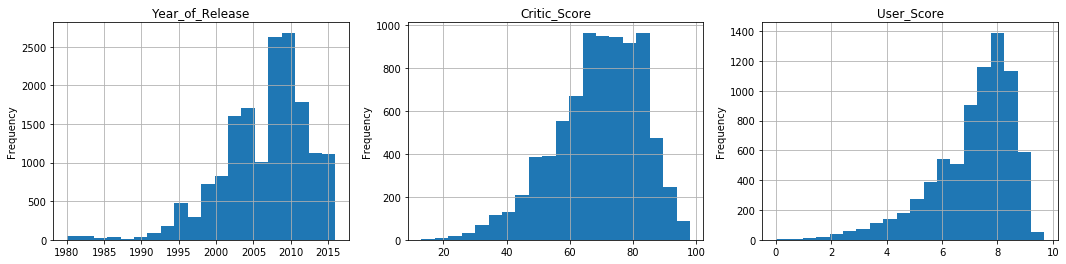

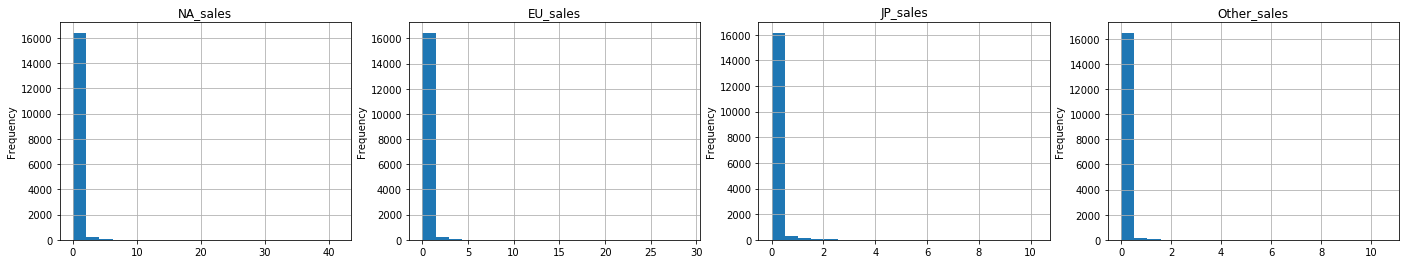

In [6]:
#Let's look at distribution of numerical features.
#function to plot several histograms in one line
def hist_in_row(cols, bins_num=None):
    cols_num = len(cols)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, col in enumerate(cols):
        if col == 'User_Score':
            pd.to_numeric(games_data[games_data.User_Score!='tbd'].User_Score)\
                .hist(ax=axes[i], bins=bins_num);      
        else:
            games_data[col].hist(ax=axes[i], bins=bins_num)
        axes[i].set_title(col)
        axes[i].set_ylabel('Frequency')
        
print(BOLD + 'Histograms for numerical features' + END)
hist_in_row(['Year_of_Release', 'Critic_Score', 'User_Score'], 20)
hist_in_row(['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'], 20)

*__Most of the games__ have been __released in the last 10 years__. The distribution of `'Year_of_Release'` feature is negatively skewed.*

*The distribution of `'Critic_Score'` and `'User_Score'` feature is also negatively skewed. Thus, __there are more high ratings than low ones__. Moreover, for user scores, the bias is greater towards higher values.*

*There are some __outliers with huge sales__ values for all markets, most of the sales are less than \$1 million.*

Histograms for not zero sales without huge values:


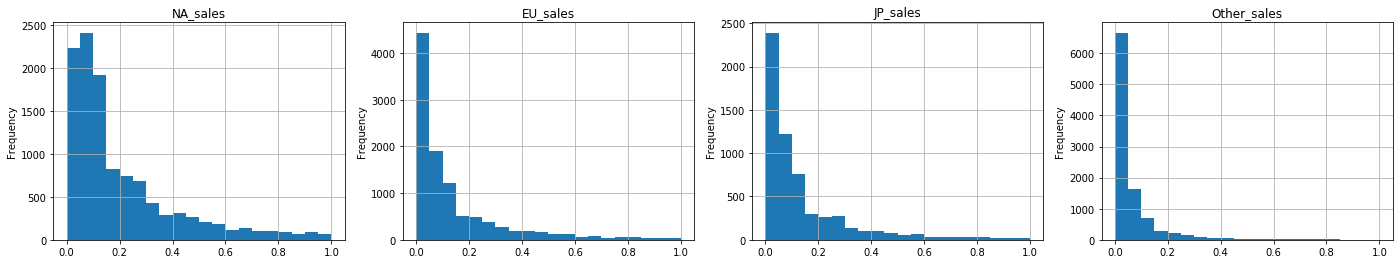

In [7]:
#Let's look at not zero sales without huge values
#function to plot several histograms of only positive values in one line
def hist_pos_in_row(cols, bins_num=None, lims=None):
    cols_num = len(cols)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, col in enumerate(cols):
        games_data[games_data[col]>0][col].hist(ax=axes[i], bins=bins_num, range=lims)
        axes[i].set_title(col)
        axes[i].set_ylabel('Frequency')

print(BOLD + 'Histograms for not zero sales without huge values:' + END)
hist_pos_in_row(['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'], 20, (0, 1))

*The sales have strong positively skewed distributions.*

The number of 'tbd' values in 'User_Score' column is 2424 which is 14.5%

Some statistics for numerical features for cases where User_Score is 'tbd' and not:


User Score is tbd                                         \
                           min positive_min    max       mean  median   
NA_sales      0.0               0.01         3.45   0.126052   0.075    
EU_sales      0.0               0.01         2.59   0.043519   0.010    
JP_sales      0.0               0.01         0.86   0.002727   0.000    
Other_sales   0.0               0.01         1.09   0.015862   0.010    
Critic_Score  23.0              23.00        90.00  60.711645  62.000   

             User Score is not tbd                                        
                               min positive_min    max       mean median  
NA_sales      0.0                   0.01         41.36  0.286670   0.08   
EU_sales      0.0                   0.01         28.96  0.162283   0.03   
JP_sales      0.0                   0.01         10.22  0.090320   0.00   
Other_sales   0.0                   0.01         10.57  0.052681   0.01   
Critic_Score  13.0                  13.00        98.00  70.233877  72.00

Distribution for numerical features for cases where User_Score is 'tbd' and not:


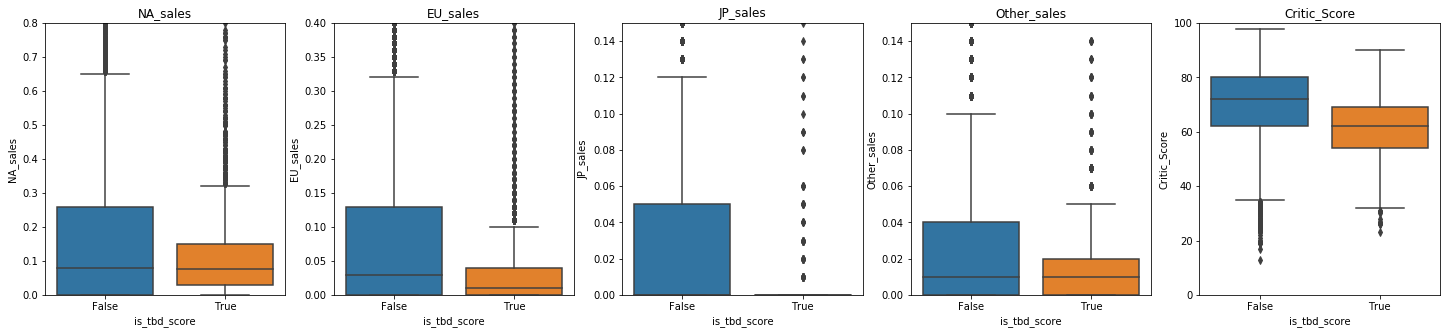

Some statistics for Percent of 'tbd' values by categorical features:


feature,Platform,Year_of_Release,Genre,Rating
min,0.00,0.00,2.00,0.00
positive_min,1.53,0.35,2.00,2.69
mean,6.52,6.56,15.35,21.07
median,1.53,0.35,13.93,7.76
max,35.15,28.40,36.38,87.50


In [8]:
#Let's look at 'tbd' values in 'User_Score' column
#calulating the number of 'tbd' values and its share
tbd_count = len(games_data[games_data.User_Score=='tbd'])
print(BOLD + "The number of 'tbd' values in 'User_Score' column is" + END, tbd_count,
      BOLD + "which is " + END + '{:.1%}'.format(tbd_count/len(games_data)))
print()


print(BOLD + "Some statistics for numerical features for cases where User_Score is 'tbd' and not:" + END)
d = {}
d['User Score is tbd'] = games_data[games_data.User_Score=='tbd']\
                             [['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']]\
                            .agg(['min', positive_min, 'max', 'mean', 'median']).T
pd.concat(d, axis=1)
d['User Score is not tbd'] = games_data[games_data.User_Score!='tbd']\
                                [['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']]\
                            .agg(['min', positive_min, 'max', 'mean', 'median']).T
display(pd.concat(d, axis=1))

#function to plot boxplots for numerical features for cases where User_Score is 'tbd' and not
def boxplots_is_tbd_in_row(features, ylims=None):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 5))
    for i, feature in enumerate(features):
        sns.boxplot(y=feature, x='is_tbd_score', ax = axes[i],
                    data=games_data.assign(is_tbd_score = games_data.User_Score=='tbd'));
        axes[i].set_title(feature)
        axes[i].set_ylim(ylims[i])

print(BOLD + "Distribution for numerical features for cases where User_Score is 'tbd' and not:" + END)
boxplots_is_tbd_in_row(['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score'],
                       [(0, 0.8), (0, 0.4), (0, 0.15), (0, 0.15), (0, 100)]) 
plt.show()

#function to calculate statistics for percent of 'tbd' values by categorical features
def tbd_value_share_by_features(data, features):
    tbd_share_dict = {'feature':[], 'min':[], 'positive_min':[], 'mean':[], 'median':[], 'max':[]}
    for feature in features:
        shares = (data[data.User_Score=='tbd'][feature].value_counts()/data[feature].value_counts()*100).fillna(0)
        tbd_share_dict['feature'].append(feature)
        tbd_share_dict['min'].append(shares.min())
        tbd_share_dict['positive_min'].append(min([x for x in shares if x > 0]))
        tbd_share_dict['mean'].append(shares.mean())
        tbd_share_dict['median'].append(shares.median())
        tbd_share_dict['max'].append(shares.max())
    return round(pd.DataFrame(tbd_share_dict).set_index('feature'),2)

print(BOLD + "Some statistics for Percent of 'tbd' values by categorical features:" + END)
display(tbd_value_share_by_features(games_data, ['Platform', 'Year_of_Release', 'Genre', 'Rating']).T)

*There are quite __a lot 'tbd' values__ in `'User_Score'` column - 14.5%.*

*__'tbd'__ values __do not correspond to any specific values of other__ numerical __features__. Sales in Europe are a little less on average, as well as critics scores (see the median), but the inter-quarter ranges are overlaping. 'tbd' values are mainly for games that were not released in the Japanese market, but there are also other user scores for games that were not released in the Japanese market.*

*There is no platform, release year, game genre, or rating for which user scores have only been filled with 'tbd'. For any genre, there are at least 2 User Scores values with 'tbd'. For one of the ratings, the percentage of such values is quite high - 87.5%.*

The number and percent of 'tbd' values by 'Rating' values:


,count,tbd_count,tbd_share
Rating,,,
AO,1,0.0,0.00
E,3990,1575.0,39.47
E10+,1420,370.0,26.06
EC,8,7.0,87.50
K-A,3,0.0,0.00
M,1563,42.0,2.69
RP,3,0.0,0.00
T,2961,380.0,12.83


The number and percent of 'tbd' values by 'Year_of_Release':


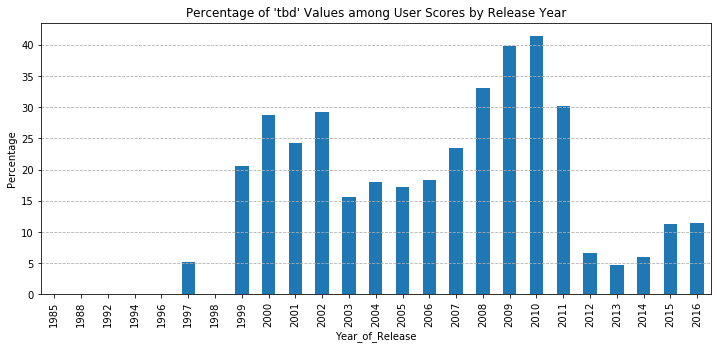

In [9]:
#Let's look at the shares of'tbd' values by 'Rating' and by 'Year_of_Release' (to see the shares for the latest data)
#function to calculate the number and percent of 'tbd' values by feature
def tbd_value_by_feature(data, feature):
    feature_counts = data.groupby(feature).agg({feature:['count']})
    tbd_counts = data[data.User_Score=='tbd'].groupby(feature).agg({feature:['count']})
    tbd_by_feature = feature_counts.join(tbd_counts, rsuffix='_tbd').fillna(0)  
    tbd_by_feature.columns = ['count', 'tbd_count']    
    tbd_by_feature['tbd_share'] = round(tbd_by_feature.tbd_count / tbd_by_feature['count'] * 100, 2)
    return tbd_by_feature

print(BOLD + "The number and percent of 'tbd' values by 'Rating' values:" + END)
display(tbd_value_by_feature(games_data, 'Rating'))

print(BOLD + "The number and percent of 'tbd' values by 'Year_of_Release':" + END)
tbd_share_by_years = tbd_value_by_feature(games_data[games_data.User_Score.notnull()], 'Year_of_Release').tbd_share
tbd_share_by_years.index = tbd_share_by_years.index.astype('int16')
ax = tbd_share_by_years.plot(kind='bar', figsize=(12, 5));
ax.set_title("Percentage of 'tbd' Values among User Scores by Release Year");
ax.set_ylabel('Percentage');
ax.grid(axis='y', linestyle='--');

*The share of 87.5% 'tbd' values corresponds to the 'EC' rating, but there are quite a few games with such a rating, only 8. Note that there are also very few games with 'AO', 'K-A' and 'RP' ratings.*

*Quite a lot games released from 1999 to 2011 have user 'tbd' score. The last 5 years, there are much fewer such values.*

*Thus, __no dependence of the appearance of the 'tbd' score on the values of other features was found__, and __'tbd' value can be replaced with an unknown one__, but __add a column corresponding to the binary feature whether the 'tbd' score was or not__.*

### Conclusions

The dataset contains information about __16,715 video games__ released in a certain year and on a certain platform. The games were released for 37 years, __from 1980 to 2016__, in the __markets of North America__, __Europe__, __Japan and other countries__. Game __sales range from \\$10,000 to \$80,000 on average__ depending on the market. 
There are 31 gaming platforms and 12 game genres. There are 8 types of ESRB ratings, 4 of which are extremely rare.

The following __problems in the data__ could be identified:
* unknown values for Names and Genres for a couple of games
* misssing values for Year of Release, Critic and User Scores, and ESRB Ratings
* there are outliers with huge Sales
* among the numerical values of User Scores, there are 'tbd'(to be determined) values

Thus, it is __necessary to investigate the missing values and to filter out outliers or consider them separately since they make a lot of revenue__. The appearance of the 'tbd' score was not found to depend on the values of other characteristics. The __value 'tbd' can be replaced with an unknown one__ and a column corresponding to the binary feature can be added, depending on whether the score was 'tbd' or not, so as not to lose this information from the dataset.

The distribution of `'Critic_Score'` and `'User_Score'` feature is also negatively skewed. Thus, __there are more high ratings than low ones__. The Sales have strong positively skewed distributions. 

In addition, the types of the columns `'Year_of_Release'` and `'Critic_Score'` can be converted to the types __int16__ and __int8__ accordingly. The type of the column `'User_Score'` can be converted to __the numeric type__ after replacing 'tbd' values with NaN ones.

<a id='section2'></a>
## 2. Data Preprocessing

<a id='section2.1'></a>
### 2.1 Data Type and Feature Names Replacement

In [10]:
#Replacing the column names makeing them lowercase in oder to make it convenient to work with them.
games_data.columns = games_data.columns.str.lower()

#converting excess type with help of astype() method:
games_data['year_of_release'] = games_data.year_of_release.astype('Int16') 
games_data['critic_score'] = games_data.critic_score.astype('Int8') 

#saving info about 'tbd' score in an aditional column:
games_data['is_tbd_score'] = games_data.user_score=='tbd'
#replacing 'tbd' rating to NaN value for further type conversion
games_data['user_score'].replace({'tbd':np.nan}, inplace=True)
#converting strings to numeric type to make it convenient to work with it
games_data['user_score'] = pd.to_numeric(games_data.user_score)

##looking at the data's general information including data types  
print(BOLD + 'The general information after type replacement:' + END)
games_data.info()

The general information after type replacement:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int16
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int8
user_score         7590 non-null float64
rating             9949 non-null object
is_tbd_score       16715 non-null bool
dtypes: Int16(1), Int8(1), bool(1), float64(5), object(4)
memory usage: 1.2+ MB


*Feature __names have been converted to lowercase for more convenient work with them__. __Excess types__ for column `'year_of_release'` and `'critic_score'` __were converted to appropriate ones__. The type of the column `'user_score'` was converted to the numeric one after replacing 'tbd' values with NaN ones.*

<a id='section2.2'></a>
### 2.2 Examing and Processing Missing Values

In [11]:
#Let's look at games with null values in name or genre
print(BOLD + "The games with null values in 'name' or 'genre' column:" + END)
display(games_data[games_data.name.isnull()|games_data.genre.isnull()])

#Let's look at the number and percentage of missing values in years of release, scores and ratings
#creating list of features with missing values
features_with_null = ['year_of_release', 'rating', 'critic_score', 'user_score']

#function to calculate the number and percentage of missing values
def missing_values_stat(data):
    return pd.DataFrame({'missing_count': data.isnull().sum(),
                      'missing_percent': round(data.isnull().sum() * 100 / len(data), 1)})

#function to calculate percent of missing values among other features with null values
def missing_values_among_other_features(features):
    d = {}
    d['feature'] = features
    for x in features:
        null_cross = []
        for y in features:
            null_cross.append(len(games_data[games_data[x].isnull()&games_data[y].isnull()]))
        d[x + ' is null'] = null_cross
    return round((pd.DataFrame(d).set_index('feature')*100)\
                 .div(games_data[features_with_null].isnull().sum().values, axis=1), 2)
    
print(BOLD + "The number, percentage of missing values and percentage of missing values among other null values:"
          + END)
d = {}
d[' '] = missing_values_stat(games_data[features_with_null])
pd.concat(d, axis=1)
d['percent of missing values among'] = missing_values_among_other_features(features_with_null)
display(pd.concat(d, axis=1))

The games with null values in 'name' or 'genre' column:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd_score
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,False
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,False


The number, percentage of missing values and percentage of missing values among other null values:


percent of missing values among  \
                missing_count missing_percent         year_of_release is null   
feature                                                                         
year_of_release  269           1.6             100.00                           
rating           6766          40.5            32.71                            
critic_score     8578          51.3            42.75                            
user_score       9125          54.6            52.79                            

                                                                        
                rating is null critic_score is null user_score is null  
feature                                                                 
year_of_release  1.30           1.34                 1.56               
rating           100.00         77.91                73.21              
critic_score     98.77          100.00               87.73              
user_score       98.73          93.32                100.00

*For two games released in 1993 on the GEN platform, the name and genre are unknown, as well as the scores of critics and users and the ESRB ratings. Perhaps this is the same game, the sales in Japan of which is recorded on a separate line of the dataset. Since this is not the most actual platform, these two unknown games may not be considered in further analysis.*

*The dataset contains slightly more than __1.5% missing years of released__, __40% missing ESRB ratings__ and __about 50% critic and user scores__. If there is __no ESRB rating, then__ there are __no scores from critics and users__ in almost __99% of cases__. If a game does __not have a critic score, then__ there is __no user score in 93% of cases__.*

*Perhaps ratings and scores can be restored by value on another platform for a given game. It is necessary to check if the rating and scores are the same for different platforms.*

In [12]:
#Let's drop rows with null game name 
games_data.dropna(subset = ['name'], inplace=True)

*Two games with unknown name have been removed.*

In [13]:
#Let's check if the rating and scores are the same for different platforms
#creating table with unique values of characteristics for given game
names_df = games_data.groupby(['name']).agg({'year_of_release':['unique'],
                                             'platform':['unique'],
                                             'rating':['nunique', 'unique'],
                                             'critic_score':['nunique', 'unique'],
                                             'user_score':['nunique', 'unique']})
names_df.columns = ['_'.join(col).strip() for col in names_df.columns.values]

print(BOLD + "Are there different ratings for a given game?" + END)
display(names_df.sort_values('rating_nunique', ascending=False).query('rating_nunique>1')\
    [['year_of_release_unique', 'platform_unique', 'rating_unique']])

print(BOLD + "Are there different scores for a given game?" + END)
display(names_df.query('critic_score_nunique>1 or user_score_nunique>1')\
    [['year_of_release_unique', 'platform_unique', 'critic_score_unique', 'user_score_unique']])

Are there different ratings for a given game?


,year_of_release_unique,platform_unique,rating_unique
name,,,
The Sims 2: Castaway,[2007],"[Wii, PSP, DS, PS2]","[T, E10+, E]"
DiRT 2,[2009],"[PS3, X360, Wii, PSP, DS, PC]","[T, E10+, E]"
WRC: FIA World Rally Championship,"[nan, 2005]","[PS3, X360, PSP, PC]","[nan, E10+, E, RP]"
"The Chronicles of Narnia: The Lion, The Witch and The Wardrobe","[nan, 2005]","[GBA, PS2, GC, XB, DS]","[E, T, E10+]"
Dawn of Discovery,[2009],"[PC, Wii, DS]","[T, E10+, E]"
...,...,...,...
Thrillville: Off the Rails,[2007],"[Wii, PS2, X360, PSP, DS]","[E10+, E]"
The Urbz: Sims in the City,[2004],"[PS2, GBA, GC, XB]","[T, E]"
Karaoke Revolution,"[2009, 2003, 2004]","[Wii, PS2, X360, PS3, XB]","[T, E]"


Are there different scores for a given game?


,year_of_release_unique,platform_unique,critic_score_unique,user_score_unique
name,,,,
007: Quantum of Solace,[2008],"[X360, PS3, Wii, PS2, DS, PC]","[65, 54, nan, 70]","[7.1, 6.6, 7.5, nan, 6.3]"
18 Wheeler: American Pro Trucker,"[2001, 2002]","[PS2, GC]","[61, 52]","[5.7, 6.8]"
187: Ride or Die,[2005],"[PS2, XB]","[52, 51]","[6.8, 6.9]"
2002 FIFA World Cup,[2002],"[PS2, XB, GC]","[73, 79, 78]","[5.6, 9.0, 7.7]"
2010 FIFA World Cup South Africa,[2010],"[PS3, X360, PSP, Wii]","[82, 83, 69, 70]","[7.8, 8.1, 7.4, 6.7]"
...,...,...,...,...
[Prototype 2],[2012],"[X360, PS3, PC]","[74, 79, 76]","[7.0, 6.8, 6.4]"
[Prototype],[2009],"[X360, PS3]","[78, 79]","[7.8, 7.7]"
de Blob 2,[2011],"[PS3, Wii, X360, DS]","[74, 79, 77, 75]","[7.1, 8.1, 7.5, 8.2]"


*Thus, __for the same game on different platforms__ there may be __different ratings__ or __different scores from critics or users__. We will consider missing ratings or scores as absent data.*

*Note that the game title "2002 FIFA World Cup" contains the year the game was released. Perhaps we can restore the release year by the name of the games.*

Investigation of 'year_of_release' missing values
Some statistics for numerical features for cases where 'year_of_release' is null or not:


year_of_releaseis null                                        \
                                min positive_min    max       mean median   
na_sales      0.0                    0.01         4.26   0.219888   0.09    
eu_sales      0.0                    0.01         2.36   0.090929   0.02    
jp_sales      0.0                    0.01         0.77   0.024907   0.00    
other_sales   0.0                    0.01         0.71   0.032007   0.01    
critic_score  22.0                   22.00        94.00  67.584416  70.00   
user_score    1.8                    1.80         9.50   7.049606   7.40    

             year_of_releaseis not null                                        
                                    min positive_min    max       mean median  
na_sales      0.0                        0.01         41.36  0.264012   0.08   
eu_sales      0.0                        0.01         28.96  0.145930   0.02   
jp_sales      0.0                        0.01         10.22  0.078487   0.00   
other_sales   0.0                        0.01         10.57  0.047594   0.01   
critic_score  13.0                       13.00        98.00  68.994363  71.00  
user_score    0.0                        0.20         9.70   7.126330   7.50

Distribution for numerical features for cases where 'year_of_release' is null or not:


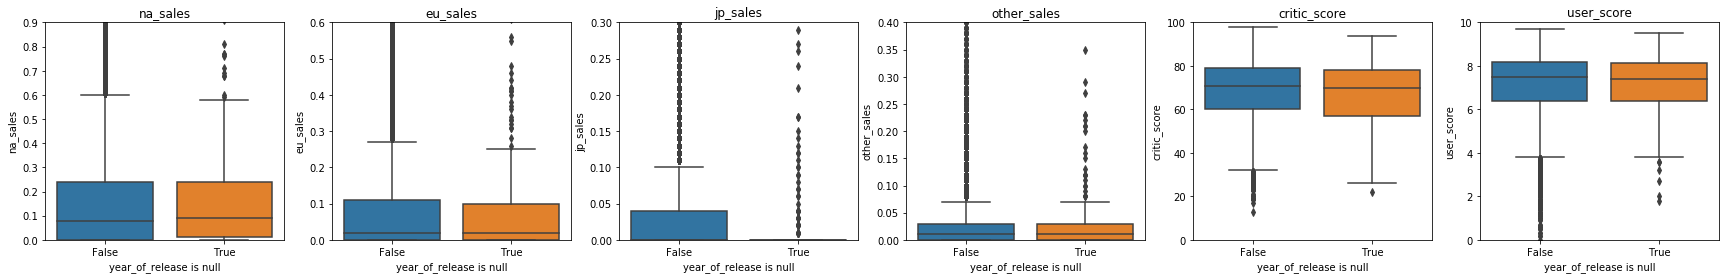

Some statistics for Percent of missing values for 'year_of_release' by categorical features:


feature,platform,genre,rating
min,0.00,0.77,0.00
positive_min,0.23,0.77,1.73
mean,1.17,1.57,0.91
median,0.23,1.72,0.86
max,12.78,2.04,1.90


Investigation of 'rating' missing values
Some statistics for numerical features for cases where 'rating' is null or not:


ratingis null                                        \
                       min positive_min    max       mean median   
na_sales      0.0           0.01         29.08  0.183424   0.00    
eu_sales      0.0           0.01         10.95  0.090671   0.00    
jp_sales      0.0           0.01         10.22  0.124472   0.02    
other_sales   0.0           0.01         2.74   0.022324   0.00    
critic_score  31.0          31.00        93.00  68.614458  70.00   
user_score    3.1           3.10         9.20   6.965116   7.35    

             ratingis not null                                        
                           min positive_min    max       mean median  
na_sales      0.0               0.01         41.36  0.317609   0.12   
eu_sales      0.0               0.01         28.96  0.182012   0.04   
jp_sales      0.0               0.01         6.50   0.045774   0.00   
other_sales   0.0               0.01         10.57  0.064352   0.02   
critic_score  13.0              13.00        98.00  68.971319  71.00  
user_score    0.0               0.20         9.70   7.126879   7.50

Distribution for numerical features for cases where 'rating' is null or not:


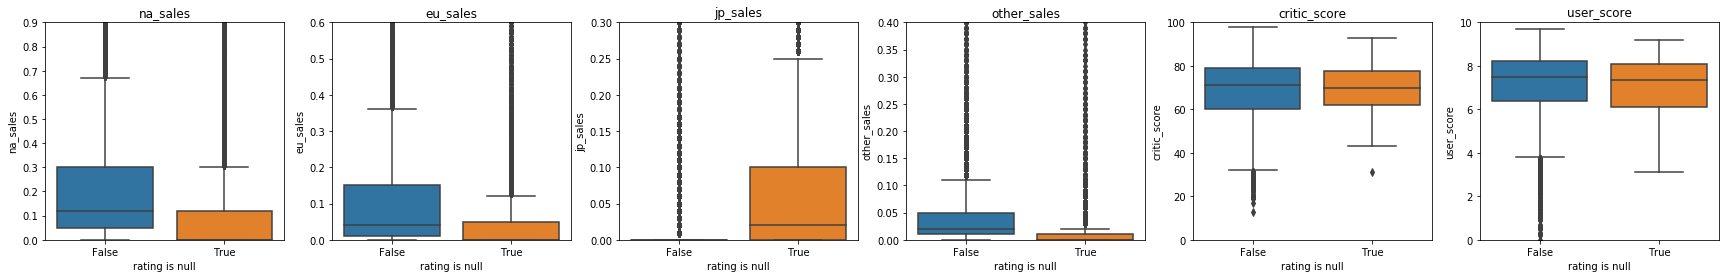

Some statistics for Percent of missing values for 'rating' by categorical features:


feature,platform,genre,year_of_release
min,11.04,22.98,20.90
positive_min,11.04,22.98,20.90
mean,65.97,41.51,68.80
median,73.08,38.48,91.56
max,100.00,65.77,100.00


The percent of 'rating' missing values by 'year_of_release':


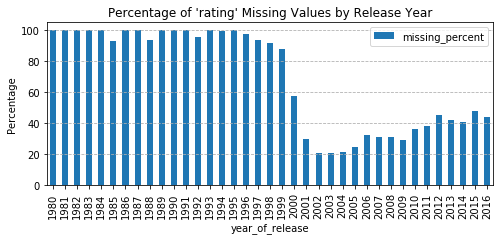

Investigation of 'critic_score' missing values
Some statistics for numerical features for cases where 'critic_score' is null or not:


critic_scoreis null                                       \
                            min positive_min    max      mean median   
na_sales     0.0                 0.01         29.08  0.178215  0.02    
eu_sales     0.0                 0.01         10.95  0.085017  0.00    
jp_sales     0.0                 0.01         10.22  0.099065  0.00    
other_sales  0.0                 0.01         2.74   0.023535  0.00    
user_score   0.0                 0.20         9.70   6.422339  7.00    

            critic_scoreis not null                                       
                                min positive_min    max      mean median  
na_sales     0.0                     0.01         41.36  0.352980  0.13   
eu_sales     0.0                     0.01         28.96  0.208311  0.05   
jp_sales     0.0                     0.01         6.50   0.055028  0.00   
other_sales  0.0                     0.01         10.57  0.072435  0.02   
user_score   0.5                     0.50         9.60   7.182428  7.50

Distribution for numerical features for cases where 'critic_score' is null or not:


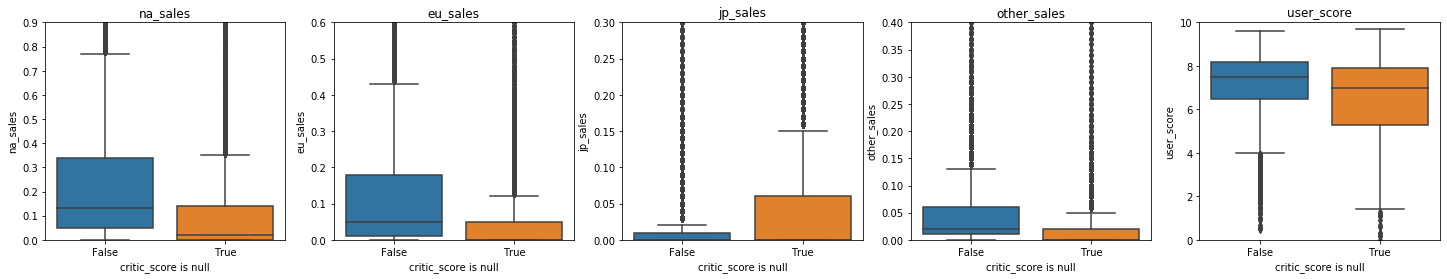

Some statistics for Percent of missing values for 'critic_score' by categorical features:


feature,platform,genre,year_of_release,rating
min,12.01,28.65,24.37,0.00
positive_min,12.01,28.65,24.37,5.12
mean,70.87,52.59,73.66,8.36
median,73.08,51.31,92.61,2.56
max,100.00,75.21,100.00,29.62


The percent of 'critic_score' missing values by 'year_of_release':


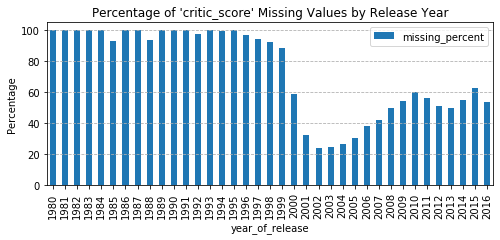

Investigation of 'user_score' missing values
Some statistics for numerical features for cases where 'user_score' is null or not:


user_scoreis null                                        \
                           min positive_min    max       mean median   
na_sales      0.0               0.01         29.08  0.169695   0.03    
eu_sales      0.0               0.01         10.95  0.078614   0.00    
jp_sales      0.0               0.01         10.22  0.093043   0.00    
other_sales   0.0               0.01         2.74   0.020682   0.00    
critic_score  23.0              23.00        90.00  60.934821  62.00   

             user_scoreis not null                                        
                               min positive_min    max       mean median  
na_sales      0.0                   0.01         41.36  0.375816   0.14   
eu_sales      0.0                   0.01         28.96  0.224893   0.06   
jp_sales      0.0                   0.01         6.50   0.059092   0.00   
other_sales   0.0                   0.01         10.57  0.079389   0.02   
critic_score  13.0                  13.00        98.00  70.249822  72.00

Distribution for numerical features for cases where 'user_score' is null or not:


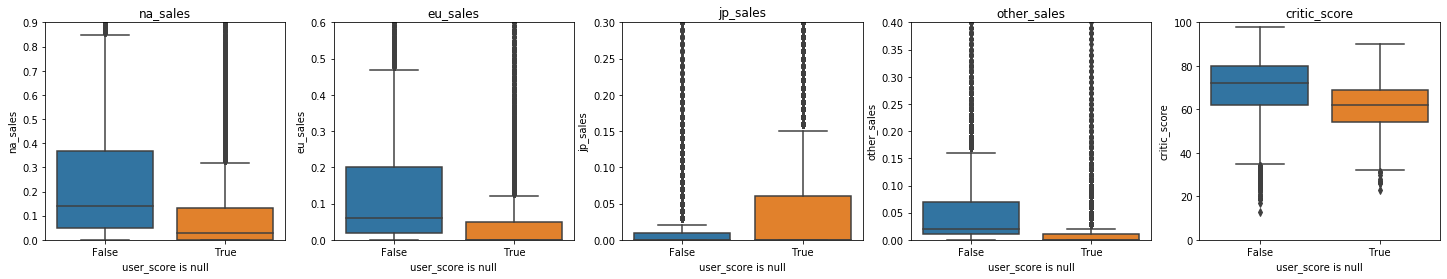

Some statistics for Percent of missing values for 'user_score' by categorical features:


feature,platform,genre,year_of_release,rating
min,20.94,30.16,33.42,0.00
positive_min,20.94,30.16,33.42,2.88
mean,72.18,56.47,75.13,10.43
median,76.01,53.01,91.82,1.44
max,100.00,77.93,100.00,40.48


The percent of 'user_score' missing values by 'year_of_release':


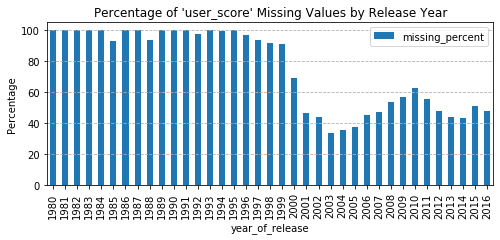

In [14]:
#Let's investigate missing values for each feature
#function to calculate numerical features statistics when the values of the considered feature are missing and not
def num_feature_for_missing_values(data, features, null_feature):
    print("Some statistics for numerical features for cases where '" + null_feature + "' is null or not:")
    d = {}
    d[null_feature + 'is null'] = data[data[null_feature].isnull()][features]\
                                .agg(['min', positive_min, 'max', 'mean', 'median']).T
    pd.concat(d, axis=1)
    d[null_feature + 'is not null'] = data[data[null_feature].notnull()][features]\
                                .agg(['min', positive_min, 'max', 'mean', 'median']).T
    display(pd.concat(d, axis=1))
    
#function to plot boxplots for numerical features when the values of the considered feature are missing and not
def boxplots_missing_values_in_row(data, features, null_feature, ylims=None):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 4))
    for i, feature in enumerate(features):
        sns.boxplot(y=feature, x='is_null', ax = axes[i],
                    data=data.dropna(subset=[feature]).assign(is_null = data[null_feature].isnull()));
        axes[i].set_title(feature)
        axes[i].set_xlabel(null_feature + ' is null')
        axes[i].set_ylim(ylims[i])
        
#function to calculate statistics for percent of missing values by categorical features
def missing_value_share_by_features(features, null_feature):
    null_share_dict = {'feature':[], 'min':[], 'positive_min':[], 'mean':[], 'median':[], 'max':[]}
    for feature in features:
        if feature == 'rating':
            shares = (games_data[games_data.rating.isin(['E', 'E10+', 'M', 'T'])\
                                 &games_data[null_feature].isnull()][feature].value_counts()\
                          /games_data[feature].value_counts()*100).fillna(0)
        else:
            shares = (games_data[games_data[null_feature].isnull()][feature].value_counts()\
                          /games_data[feature].value_counts()*100).fillna(0)
        null_share_dict['feature'].append(feature)
        null_share_dict['min'].append(shares.min())
        null_share_dict['positive_min'].append(min([x for x in shares if x > 0], default=np.nan))
        null_share_dict['mean'].append(shares.mean())
        null_share_dict['median'].append(shares.median())
        null_share_dict['max'].append(shares.max())
    return round(pd.DataFrame(null_share_dict).set_index('feature'), 2)

#function to calculate the number and percent of misssing values by feature
def missing_value_by_feature(feature, null_feature):
    feature_counts = games_data.groupby(feature).agg({feature:['count']})
    null_counts = games_data[games_data[null_feature].isnull()].groupby(feature).agg({feature:['count']})  
    null_by_feature = round(null_counts / feature_counts * 100, 2)
    null_by_feature.columns = ['missing_percent']
    return null_by_feature

#function to plot percent of missing values by year of release
def plot_missing_percent_by_year(null_feature):
    print("The percent of '" + null_feature + "' missing values by 'year_of_release':")
    percent_by_years = missing_value_by_feature('year_of_release', null_feature)
    ax = percent_by_years.plot(kind='bar', figsize=(8, 3));
    ax.set_title("Percentage of '" + null_feature + "' Missing Values by Release Year");
    ax.set_ylabel('Percentage');
    ax.grid(axis='y', linestyle='--');

#function to show all investigations for feature with missing values
def null_info(num_features, num_lims, cat_features, null_feature):
    print(BOLD + "Investigation of '" + null_feature + "' missing values" + END)
    num_feature_for_missing_values(games_data, num_features, null_feature)
                                   
    print("Distribution for numerical features for cases where '" + null_feature + "' is null or not:")
    boxplots_missing_values_in_row(games_data, num_features, null_feature, num_lims)                                 
    plt.show()

    print("Some statistics for Percent of missing values for '" + null_feature + "' by categorical features:")
    display(missing_value_share_by_features(cat_features, null_feature).T)
    
    if null_feature != 'year_of_release':
        plot_missing_percent_by_year(null_feature)
        plt.show()

#creating lists of numerical and categorical features
cat_features = ['platform', 'year_of_release', 'genre', 'rating']
num_features_lims_dic = {'na_sales': (0, 0.9), 'eu_sales': (0, 0.6), 'jp_sales': (0, 0.3),
                    'other_sales': (0, 0.4), 'critic_score': (0, 100), 'user_score': (0, 10)} 

#Let's look at categorical features with missing values
for cat_null in ['year_of_release', 'rating']:
    cat_features.remove(cat_null)
    null_info(num_features_lims_dic.keys(), list(num_features_lims_dic.values()),
              cat_features, cat_null)
    cat_features.append(cat_null)

#Let's look at numerical features with missing values
for num_null in ['critic_score', 'user_score']:
    lims = num_features_lims_dic.pop(num_null)
    null_info(num_features_lims_dic.keys(), list(num_features_lims_dic.values()),
              cat_features, num_null)
    num_features_lims_dic[num_null] = lims

*There is __no dependence of the appearance of unknown value of the year of released on the values of other features__:  the average values (see median) of numerical features do not differ, their interquartile ranges overlap strongly, and the missing values are evenly distributed among the values of categorical features.*

*__For games with a missing ESRB rating__, __sales__ in all markets except Japanese __are lower in average__ (see medians and corresponding boxplots). For the Japanese market, sales for non-rated games, on the other hand, are higher on average. __For some platforms__, perhaps not the most popular or fresh, __the rating is completely absent.__ For all platforms, at least 10% of games have no ratings. More than 20% of ratings are missing in every genre. At least 20% of ratings are missing for each release year. Ratings are almost completely absent for games released before 2000.*

*__For games with a missing ctitic score, sales__ in all markets except Japanese __are also lower in average__. For some platforms the critic scores are also completely absent. For all platforms, at least 12% of games have no critic scores. Almost 25% of scores are missing in every genre. For most of genres there are critic score only for half of released games. __The ctitic scores are almost completely absent for games released before 2000.__ There are 75% critic scores for games with release years from 2001 to 2005. After that, only half of the released games has scores.*

*__For games with a missing user score, sales__ in all markets except Japanese are lower __in average and critic scores are also lower in average__. For some platforms the users scores are almost completely absent. For all platforms, at least 20% of games have no user scores. 30% of scores are missing in every genre. For most of genres there are user score only for half of released games. __The user scores are almost completely absent for games released before 2000.__ After there are scores only for half of released games.*

*The difference in sales for the missing ratings and scores may be related to the growth of the market as a whole, and the missing values are mostly consistent with earlier releases. It is necessary to look at more recent data.*

Values of 'rating' are missing after 2000:
Some statistics for numerical features for cases where 'rating' is null or not:


ratingis null                                       \
                      min positive_min    max      mean median   
na_sales     0.0           0.01         9.05   0.097005  0.00    
eu_sales     0.0           0.01         10.95  0.070271  0.00    
jp_sales     0.0           0.01         6.04   0.079433  0.02    
other_sales  0.0           0.01         2.74   0.021531  0.00    

            ratingis not null                                       
                          min positive_min    max      mean median  
na_sales     0.0               0.01         41.36  0.314073  0.12   
eu_sales     0.0               0.01         28.96  0.179636  0.04   
jp_sales     0.0               0.01         6.50   0.042802  0.00   
other_sales  0.0               0.01         10.57  0.064881  0.02

Distribution for numerical features for cases where 'rating' is null or not:


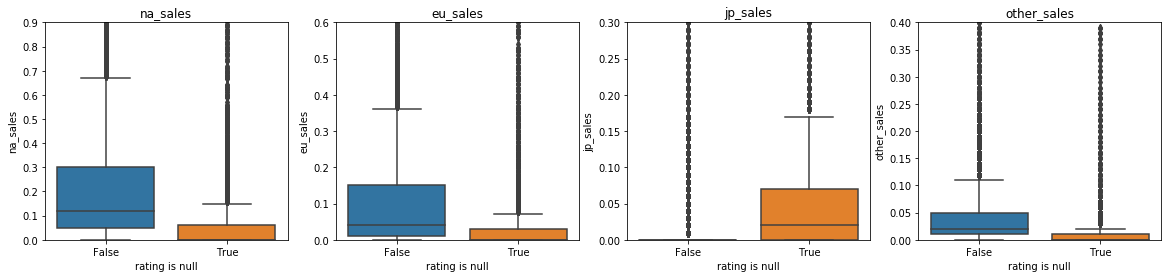

Values of 'critic_score' are missing after 2000:
Some statistics for numerical features for cases where 'critic_score' is null or not:


critic_scoreis null                                       \
                            min positive_min    max      mean median   
na_sales     0.0                 0.01         9.05   0.113689  0.01    
eu_sales     0.0                 0.01         10.95  0.068657  0.00    
jp_sales     0.0                 0.01         6.04   0.058780  0.00    
other_sales  0.0                 0.01         2.74   0.023487  0.00    

            critic_scoreis not null                                       
                                min positive_min    max      mean median  
na_sales     0.0                     0.01         41.36  0.349978  0.13   
eu_sales     0.0                     0.01         28.96  0.205976  0.05   
jp_sales     0.0                     0.01         6.50   0.051429  0.00   
other_sales  0.0                     0.01         10.57  0.073184  0.02

Distribution for numerical features for cases where 'critic_score' is null or not:


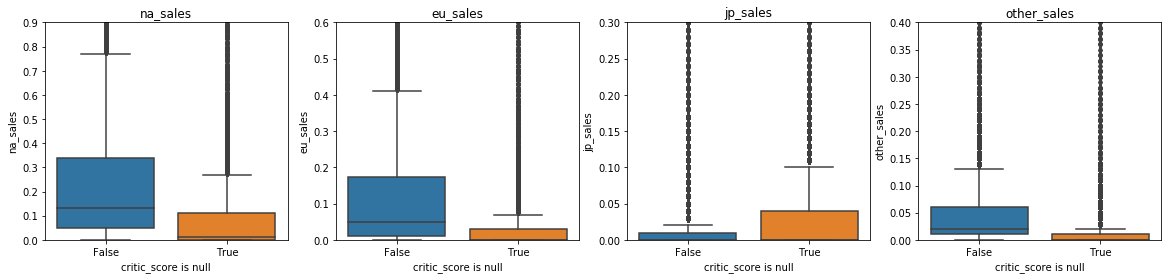

Values of 'user_score' are missing after 2000:
Some statistics for numerical features for cases where 'user_score' is null or not:


user_scoreis null                                       \
                          min positive_min    max      mean median   
na_sales     0.0               0.01         9.05   0.106704  0.02    
eu_sales     0.0               0.01         10.95  0.060703  0.00    
jp_sales     0.0               0.01         6.04   0.054399  0.00    
other_sales  0.0               0.01         2.74   0.019628  0.00    

            user_scoreis not null                                       
                              min positive_min    max      mean median  
na_sales     0.0                   0.01         41.36  0.372185  0.14   
eu_sales     0.0                   0.01         28.96  0.222558  0.05   
jp_sales     0.0                   0.01         6.50   0.055078  0.00   
other_sales  0.0                   0.01         10.57  0.080110  0.02

Distribution for numerical features for cases where 'user_score' is null or not:


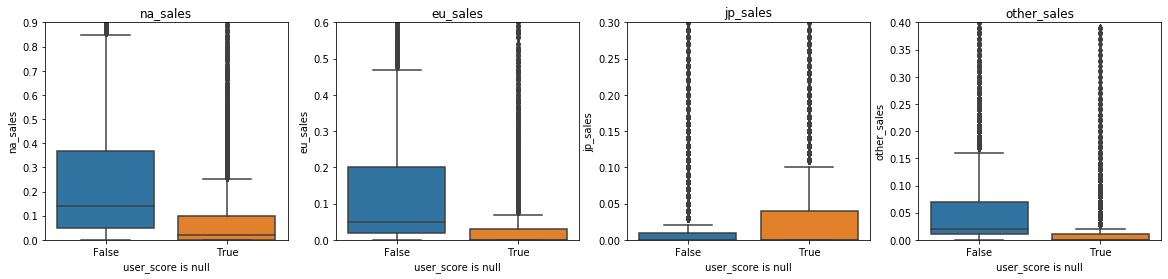

In [15]:
#Let's look at data after 2000 
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for feature in ['rating', 'critic_score', 'user_score']:
    print(BOLD + "Values of '" + feature + "' are missing after 2000:" + END)
    num_feature_for_missing_values(games_data[games_data.year_of_release>2000], sales, feature)
    print("Distribution for numerical features for cases where '" + feature + "' is null or not:")
    boxplots_missing_values_in_row(games_data[games_data.year_of_release>2000], sales, feature,
                                   [num_features_lims_dic[s] for s in sales])
    plt.show()

*On data after 2000 the __sales__ in all markets except Japanese are also __lower in average for games with missing ESRB ratings or scores__. In Japan, apparently they do not look at ratings and scores, or do not know about them.*

In [16]:
#Let's look if there is a year in the name of the game for the missing 'year_of_release'
names_with_digit = games_data[(games_data.year_of_release.isnull())\
                                  &games_data.name.str.findall(' \d{2}').str[0].notnull()][['name']]
print(BOLD + "There are {} games with digits in the name for the missing 'year_of_release'. "\
                  .format(len(names_with_digit)) + END)
print('Some of them: ')
display(names_with_digit.head(10))

print(BOLD + 'Some of these games have a release year filled for other platforms:' + END)
names_with_digits_exist_year = games_data.query('name in @names_with_digit.name and year_of_release>0')\
    [['name', 'year_of_release']].drop_duplicates()
display(names_with_digits_exist_year)

print(BOLD + 'For other games, numbers are cut from the name:' + END)
rest_names_with_digit = (set(names_with_digit.name)-set(names_with_digits_exist_year.name))
rest_names_with_digit = pd.DataFrame({'name': list(rest_names_with_digit),
              'year_of_release': [int(''.join(filter(str.isdigit, name))) for name in rest_names_with_digit]})
display(rest_names_with_digit)

There are 25 games with digits in the name for the missing 'year_of_release'. 
Some of them: 


,name
183,Madden NFL 2004
377,FIFA Soccer 2004
475,wwe Smackdown vs. Raw 2006
1301,Triple Play 99
1650,NASCAR Thunder 2003
2479,Madden NFL 07
2492,MLB SlugFest 20-03
2572,PES 2009: Pro Evolution Soccer
2849,Madden NFL 11
3413,Madden NFL 06


Some of these games have a release year filled for other platforms:


,name,year_of_release
213,Madden NFL 06,2005
241,Madden NFL 07,2006
452,Madden NFL 2002,2001
561,Madden NFL 11,2010
617,PES 2009: Pro Evolution Soccer,2008
1104,NBA Live 2003,2002
1881,Madden NFL 2004,2003
2606,FIFA Soccer 2004,2003
2834,Tiger Woods PGA Tour 07,2006
4329,PES 2009: Pro Evolution Soccer,2009


For other games, numbers are cut from the name:


,name,year_of_release
0,Football Manager 2007,2007
1,Drake of the 99 Dragons,99
2,Sega Rally 2006,2006
3,NFL GameDay 2003,2003
4,All-Star Baseball 2005,2005
5,wwe Smackdown vs. Raw 2006,2006
6,Famista 64,64
7,Tour de France 2011,2011
8,Indy 500,500
9,Triple Play 99,99


*__For a small number of games__, we can __restore the missed year of release by the name__ of the game. Note that some of these games have a release year for other platforms. Moreover, sometimes the name contains the next year after the year of relese. We can use this data and fill in the missing values. For the rest of the missing years of release, we will extract value from the name, removing games containing numbers that do not correspond to the year, such as 'Drake of the 99 Dragons' or 'Indy 500'.*

In [17]:
#filling in 'year_of_release' by other platforms for game names with year 
names_exist_year_dict = names_with_digits_exist_year.set_index('name')['year_of_release'].to_dict()
games_data.year_of_release.fillna(games_data.name.map(names_exist_year_dict), inplace=True)
#filling in 'year_of_release' by extracted year from game names 
rest_names_with_digit_dict = rest_names_with_digit.query('year_of_release>2000')\
    .set_index('name')['year_of_release'].to_dict()
games_data.year_of_release.fillna(games_data.name.map(rest_names_with_digit_dict), inplace=True)

print("The missing 'year_of_release' for {} games are filled."\
          .format(269-games_data.year_of_release.isnull().sum()))

The missing 'year_of_release' for 21 games are filled.


*The missed `'year_of_release'` for 21 games has been restored from the name of the game.*

<a id='section2.3'></a>
### 2.3 Examing and Processing Duplicates

In [18]:
#Let's check for duplicates
games_data[games_data.duplicated(['name', 'platform', 'year_of_release'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_tbd_score
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,False
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,False


*There is __one duplicate game__ in the dataset (the name, release year and platform are the same), but with different sales in the European market. Note that the ratings and scores of critics and users are the same as well. We can __add up the sales__ for this game and leave only one line for the game.*

In [19]:
#Let's drop duplicates
#appending a row with the sum of 'eu_sales'
games_data = games_data.append(games_data[games_data.duplicated(['name', 'platform', 'year_of_release'], keep=False)]\
                                  .groupby(['name','platform', 'year_of_release'])\
                                      .agg({'genre':'first', 'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum',
                                            'other_sales':'sum', 'critic_score':'first', 'user_score':'first',
                                            'rating':'first', 'is_tbd_score':'first'}).reset_index())

#calling append for old version of pandas leads to changing the year_of_release type from int to object
#it's it's necessary to convert type again or update pandas
games_data['year_of_release'] = games_data.year_of_release.astype('Int16') 

#dropping duplicates except for the last added row 
games_data.drop_duplicates(['name', 'platform', 'year_of_release'], keep='last', inplace=True)
games_data.reset_index(inplace=True, drop=True)

*The duplicate row has been removed.*

<a id='section2.4'></a>
### 2.4 Additional calculations

In [20]:
#Let's calculate the total sales for each game
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

*The `'total_sales'` feature have been calculated, which are necessary for further analysis.*

<a id='section2.5'></a>
### 2.5 Investigation of outliers

In [21]:
#Let's look at games with huge sales
#function to calculate Q3+1.5IQR value
def outliers_border(series):
    Q1 = series.quantile(0.25) 
    Q3 = series.quantile(0.75) 
    IQR = Q3 - Q1 
    return Q3 + 1.5 * IQR

#function to calculate the percentsge of outliers
def perc_outliers(series):
    border = outliers_border(series)
    return sum(value > border for value in series) * 100 / len(series)

print(BOLD + 'Some statistic to determine the limits of outliers:' + END)
games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']]\
    .agg(['min', 'max', 'mean', 'median', outliers_border, perc_outliers]).T

Some statistic to determine the limits of outliers:


,min,max,mean,median,outliers_border,perc_outliers
na_sales,0.0,41.36,0.263318,0.08,0.600,10.088559
eu_sales,0.0,28.96,0.145054,0.02,0.275,12.326472
jp_sales,0.0,10.22,0.077629,0.00,0.100,14.564385
other_sales,0.0,10.57,0.047346,0.01,0.075,13.415510
total_sales,0.0,82.54,0.533347,0.17,1.085,11.303255


*__The upper whiskers of market sales boxplots__ (the approximate border of the "typical" range) end much far from the maximum sales. We can __set__ these values __as borders for bestsellers__ to take into account them separatly in further analysis.*

In [22]:
#Let's add flag features, whether sales are huge or not for each market
sales = sales + ['total_sales']
for sale in sales:
    border = outliers_border(games_data[sale])
    games_data['huge_'+sale] = games_data[sale] > border

print(BOLD + 'Several rows of the dataset after adding new features:' + END)
display(games_data[['name', 'platform', 'year_of_release'] + sales + ['huge_'+s for s in sales]].sample(5))

Several rows of the dataset after adding new features:


,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,huge_na_sales,huge_eu_sales,huge_jp_sales,huge_other_sales,huge_total_sales
2828,NBA Live 08,PS2,2007,0.59,0.02,0.01,0.10,0.72,False,False,False,True,False
7066,Super R-Type,SNES,1991,0.00,0.00,0.23,0.00,0.23,False,False,True,False,False
3105,Centipede,PS,1998,0.36,0.25,0.00,0.04,0.65,False,False,False,False,False
5372,Frostbite,2600,1983,0.32,0.02,0.00,0.00,0.34,False,False,False,False,False
4927,Chessmaster,PS2,2003,0.19,0.15,0.00,0.05,0.39,False,False,False,False,False


Distribution of total sales for bestsellers by release years:


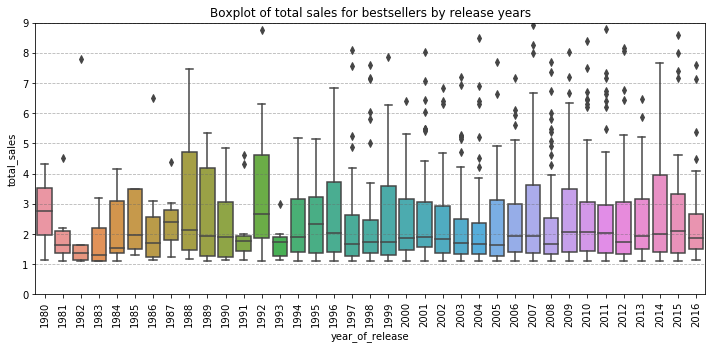

Persentage of bestsellers by release years:


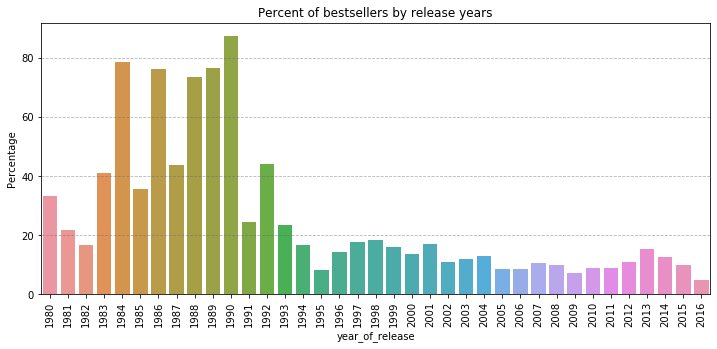

In [23]:
#Let's look at distribution of sales for bestsellers by release years
print(BOLD + 'Distribution of total sales for bestsellers by release years:' + END)
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='year_of_release', y='total_sales', data=games_data[games_data.huge_total_sales==True], ax=ax,
            order = pd.Series(sorted(games_data.year_of_release.dropna().unique())));
ax.set_ylim(0, 9);
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Boxplot of total sales for bestsellers by release years')
ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
plt.show()

print(BOLD + 'Persentage of bestsellers by release years:' + END)
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='year_of_release', y='huge_total_sales', ax=ax,\
            data=(games_data.groupby('year_of_release').huge_total_sales.sum()\
                      /games_data.groupby('year_of_release').huge_total_sales.count()*100).reset_index());
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Percent of bestsellers by release years')
ax.set_ylabel('Percentage');
ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)

*The distribution of sales for games with different release years is very different, but in the last 8 years it is very similar and the average sales of bestsellers at this time are $ 2 mln.*

*The dataset has a large percentage of huge sales for games from 1983 to 1992. After 2005, the percentage of bestsellers is about 10\%, with the exception of 2013, where there are slightly more of them.*

#### Conclusions

To prepare the data for further analysis, the following steps were taken:
1. Feature names have been converted to __lowercase__ for more convenient work with them
2. The necessary __type conversions__ have been made. Additionally, the 'tbd' value of 'user_score' feature was replaced with NaN after saving info about 'tbd' score in an aditional column.
3. Two not actual games (released in 1993) with __unknown name__ have been __removed__.
4. The __missed 'year_of_release'__ for 21 games has been __restored from the game names containing them__. The remaining 248 missing release years, which is 1.5% of the data, are difficult to restore from the available data.
5. Other __missing values__ were examed. There are 40% missing ESRB ratings and about 50% critic and user scores (they almost completely absent for games released before 2000), which cannot be restored from the rest of the feature values, since e.g. the rating and scores are not the same for different platforms for the same game. Missing ratings and scores are not always in the same lines, but generally, there are no critical scores for games that are not rated, and there are no user scores for games that have not critics scores. If consider missing ratings and scores as absent data, the sales in all markets except Japanese are lower in average for games with missing ESRB ratings or scores and games with lower critical scores are less likely to be rated by users.
6. There is one __duplicate game__ in the dataset (the name, release year and platform are the same) and we removed duplicate row. 
7. Additionally, for further analysis, __the total sales over all markets was calculated__.
8. There are __games with huge sales__ of 10% to 15% for each market. To mark these __besselers__, the corresponding boolean features have been added for different market. For the latest data, sales of bestsellers are evenly distributed over the years. This means that we can consider bestsellers together with typical representatives of games.

<a id='section3'></a>
## 3. Exploratory Data Analysis

### Number of games released in different years

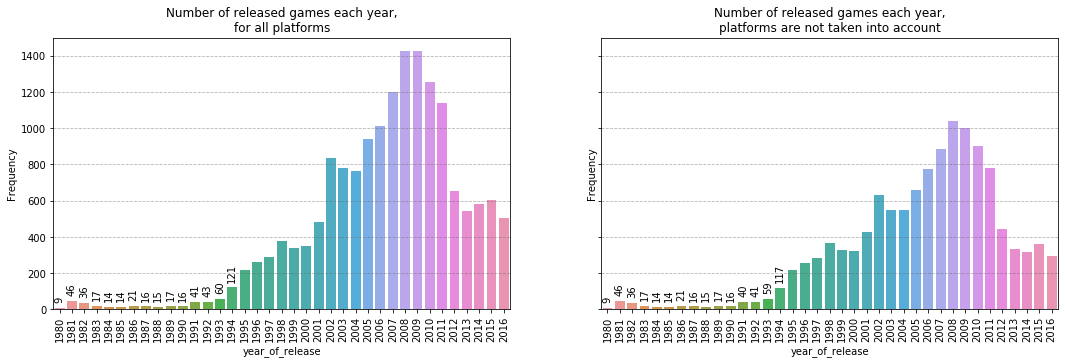

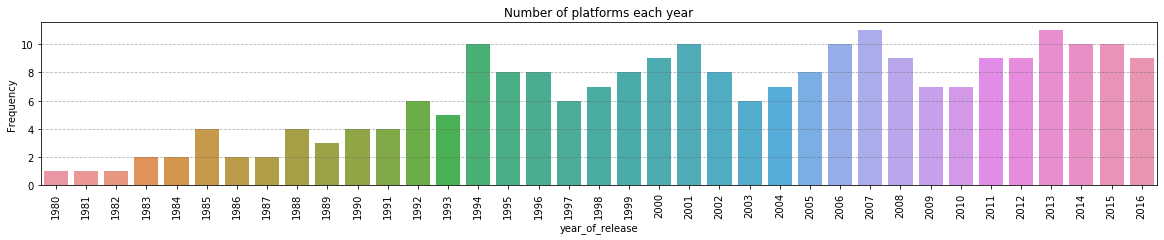

In [24]:
#Let's look at how many games were released in different years
def samples_barplot_in_row(samples, descriptions):
    cols_num=len(samples)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(9*cols_num, 5), sharey=True)
    for i, (data, descr) in enumerate(zip(samples, descriptions)):
        sns.barplot(x='year_of_release', y='name', ax=axes[i], data=data);
        axes[i].set_title('Number of released games each year' + descr);
        axes[i].set_ylabel('Frequency');
        #adding labels for not significant numbers of games 
        rects = axes[i].patches
        labels = [str(v) for v in data.name if v<200]
        for rect, label in zip(rects[:len(labels)], labels):
            height = rect.get_height()
            axes[i].text(rect.get_x() + rect.get_width() / 2, height + 30, label,
                    ha='center', va='bottom', rotation=90)
        axes[i].set_xticklabels(data.year_of_release.values);
        axes[i].xaxis.set_tick_params(rotation=90);
        axes[i].grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)

samples_barplot_in_row([games_data.groupby('year_of_release').name.agg('count').reset_index(),
                        games_data[['name', 'year_of_release']].drop_duplicates()\
                            .groupby('year_of_release').name.agg('count').reset_index()],
                       [',\nfor all platforms', ',\nplatforms are not taken into account'])


#Let's look at how many platforms were existed in different years
fig, ax = plt.subplots(figsize=(20, 3));
sns.barplot(x='year_of_release', y='platform', ax=ax,
            data=games_data.groupby(['year_of_release']).platform.nunique().reset_index());
ax.set_title('Number of platforms each year');
ax.set_ylabel('Frequency');
ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
ax.xaxis.set_tick_params(rotation=90);

*In the first graph (left) we consider the game released on different platforms as different games, in the second graph (right) platforms are not taken into account. __Until 2008, the number of games released increases significantly__. Moreover, __until 2000, games were released for each platform different__ (the number of games for both graph are the same), __after that the same game was released for several platforms at once__, which looks like an explosive growth in the number of games (see the 1st graph). __After 2012, the number of games released has dropped sharply and has not changed significantly afterwards__, although the number of existing platforms has not changed significantly.
Until 1995, the number of games was not significant.*

### Platforms: sales and a lifetime

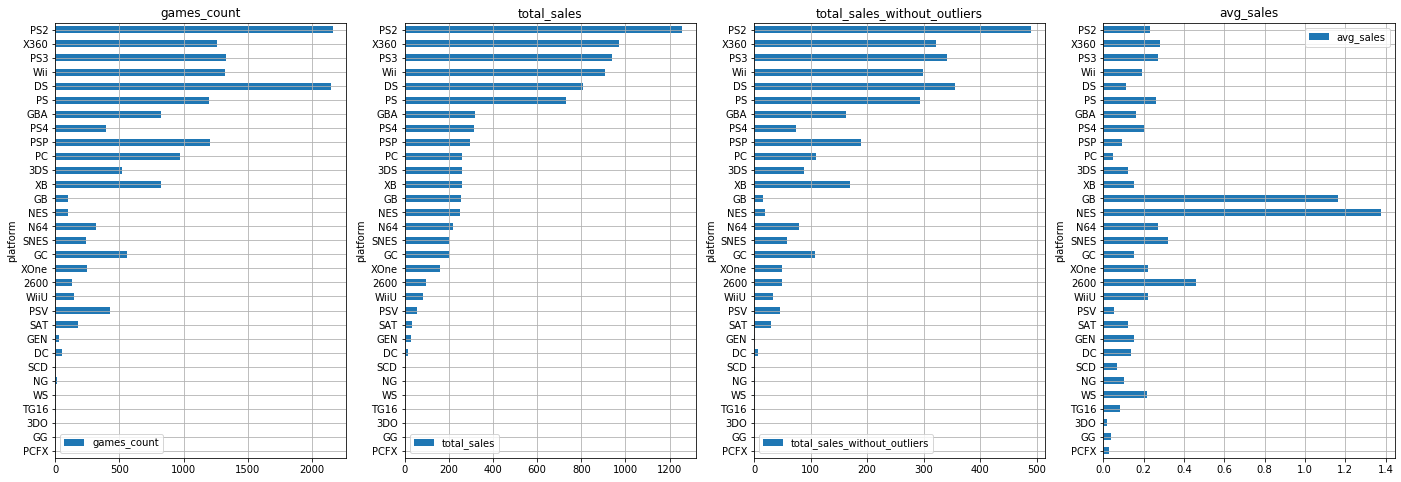

In [25]:
#Let's look at number of games and the total sales for each platform
#function to calculated pivot table for platforms
def get_platform_sales(data):
    platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc=['count', 'sum', 'median'])
    platform_sales.columns = ['games_count', 'total_sales', 'avg_sales'] 
    return platform_sales

#function to plot several barplot in one line
def barplot_in_row(data, features):
    cols_num=len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 8))
    for i, feature in enumerate(features):
        data.plot.barh(y=feature, ax=axes[i], grid=True)
        axes[i].set_title(feature)

#calculating pivot table for platforms        
platform_sales = get_platform_sales(games_data)
platform_sales_without_outliers = get_platform_sales(games_data[games_data.huge_total_sales==False])
platform_sales['total_sales_without_outliers'] = platform_sales_without_outliers.total_sales

#plotting number of games and the total sales for each platform
barplot_in_row(platform_sales.sort_values('total_sales'), 
               ['games_count', 'total_sales', 'total_sales_without_outliers', 'avg_sales'])

*__In terms of total sales, the PlayStation 2 is the absolute leader__, even if we exclude the bestsellers with huge sales (see graph for total sales without outliers). __This console has the largest number of games released__, as well as  __the Nintendo DS__, but for a portable console the average price of a game is lower. Note that the median is considered as the average sales due to the presence of outliers. __The leaders in terms of sales and the number of released games__ also include 2 more versions of PlayStation: __PS__ and __PS3__, and __the Xbox 360__ and __the Nintendo Wii__. The latest versions of these consoles: the PlayStation4, the Xbox One and the Nintendo Wii U lag far behind in total sales and the number of games released for them. Note that the total sales include all sales from the moment the game was released until the current moment, respectively, this explains the fact that consoles that have appeared relatively recently (with smaller lifetime) are lagging behind.*

*Let's see how bestselling games affect total sales in an example of the Nintendo Entertainment System (NES) and the Game Boy (GB). Their average sales are quite high, but if we exclude these outliers, then the total sales of other games will be significantly lower.*

Lifetime of platforms:


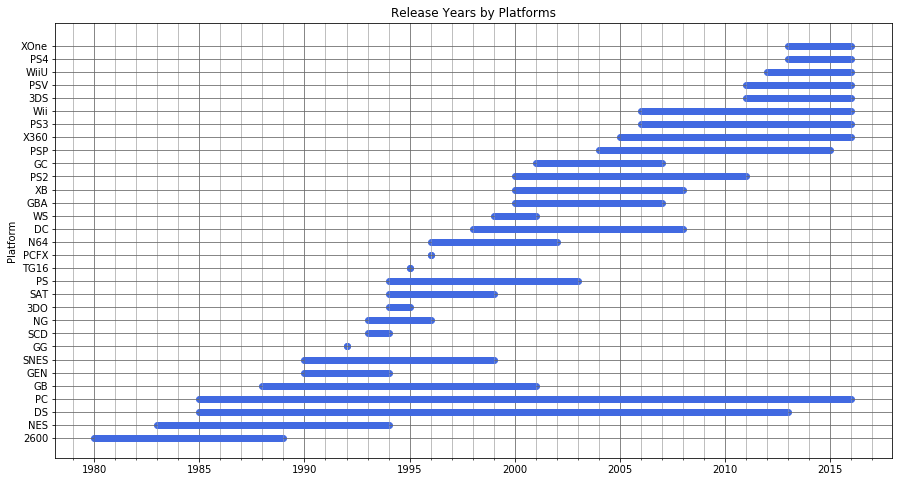

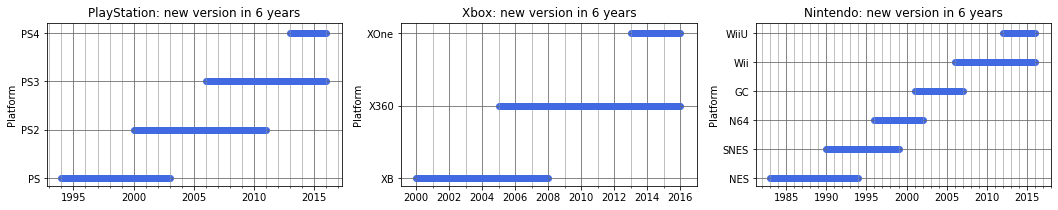

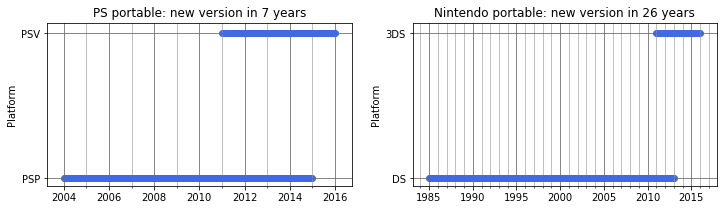

Histogram for a lifetime for a platform:


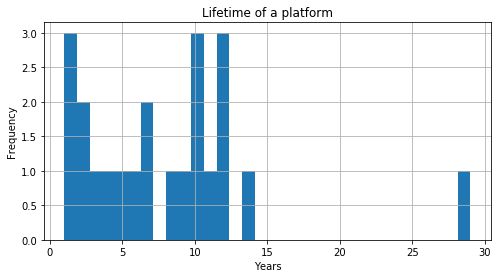

Average lifetime of a platform is 7.5 years


In [26]:
#Let's look at lifetime for different platforms
platform_lifetime = games_data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platform_lifetime.columns = ['min_date', 'max_date'] 
platform_lifetime.sort_values(['min_date', 'max_date'], inplace=True)

#function to plot lifetime for platforms
def plot_lifetime(data, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 8))
    for i in range(len(data)):
        ax.hlines(data.index[i], xmin=data.iloc[i].values[0], xmax=data.iloc[i].values[1],
                  linewidth=7.0, color='royalblue');
        ax.scatter(x=data.iloc[i,:], y=[data.index[i]]*2, color='royalblue')
        ax.grid(color='dimgray')
        xticks = ax.get_xticks()
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(xticks[1]-xticks[0]))
        ax.grid(b=True, which='minor')
        ax.set_ylabel('Platform')
        ax.set_title('Release Years by Platforms')

print(BOLD + 'Lifetime of platforms:'  + END)
plot_lifetime(platform_lifetime)
plt.show()

#dictionary for names of consoles and their versions
console_series = {'PlayStation': ['PS', 'PS2', 'PS3', 'PS4'],
                  'PS portable': ['PSP', 'PSV'],
                  'Xbox': ['XB', 'X360', 'XOne'],
                  'Nintendo': ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU'],
                  'Nintendo portable': ['DS', '3DS']}

#function to calculate time after which a new version of a platform appears
def new_platform_take(platforms):
    years_before_new = []
    for i in range(len(platforms)-1):
        years_before_new.append(platform_lifetime.loc[platforms[i+1], 'min_date']\
                                   - platform_lifetime.loc[platforms[i], 'min_date'])
    return years_before_new

#function to plot lifetime for different versions of consoles
def plot_lifetime_in_row(console_names):
    cols_num=len(console_names)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 3))
    for i, name in enumerate(console_names):
        plot_lifetime(platform_lifetime[platform_lifetime.index.isin(console_series[name])], ax=axes[i])
        new_platform_appearence = round(np.mean(new_platform_take(console_series[name])))
        axes[i].set_title(name + ': new version in ' + str(new_platform_appearence) + ' years')
    plt.show()

#ploting lifetime for different versions of consoles
plot_lifetime_in_row(['PlayStation', 'Xbox', 'Nintendo'])
plot_lifetime_in_row(['PS portable', 'Nintendo portable'])

#calculating a lifetime for each platform
platform_lifetime['lifetime'] = platform_lifetime.max_date - platform_lifetime.min_date + 1

#we do not take into account the platforms that are still on the market, because their lifetime is not over yet
print(BOLD + 'Histogram for a lifetime for a platform:'  + END)
ax = platform_lifetime[platform_lifetime.max_date!=2016].lifetime.hist(bins=32, figsize=(8, 4));
ax.set_title('Lifetime of a platform');
ax.set_xlabel('Years');
ax.set_ylabel('Frequency');
plt.show()

print(BOLD + 'Average lifetime of a platform is {} years'\
                  .format(platform_lifetime[platform_lifetime.max_date!=2016].lifetime.median()) + END)

*There are platforms that have only been around for one year, and there are the Nintendo DS that have been around for 29 years. The personal computer has been used for games since 1985. __On average, platforms exist for 7.5 years__, after which new games are no longer released for it. __The new version of the console comes out in 6-8 years__, the new version for the Nintendo DS came out only 26 years later. We should not bet on platforms that have existed for more than 6 years, as a new version of the console may appear soon and new games will cease to be released.*

*For 2016, there are simultaneously the current and previous versions of the PlayStation, the Xbox and the Nintendo Wii. It makes sense to predict only for actual platforms.*

Histograms of number of games by release year for each actual platform:


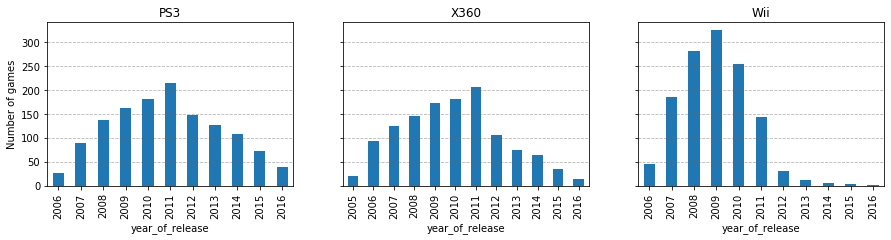

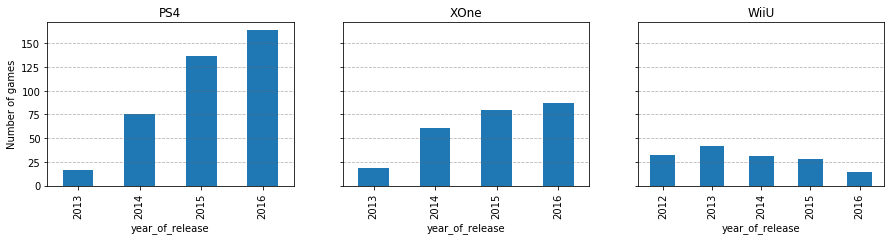

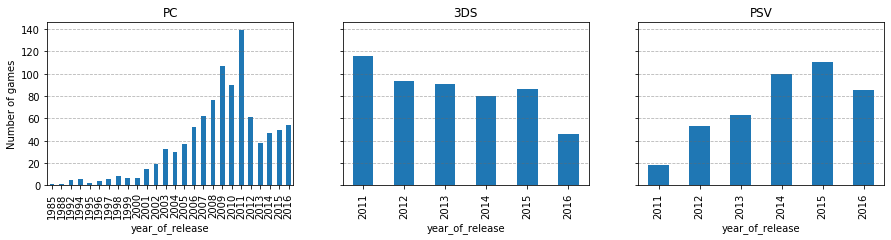

Boxblots of total sales of games (without bestsellers) by release year:
Rem: Eliminate the bessellers to look at the distribution of sales for the average game


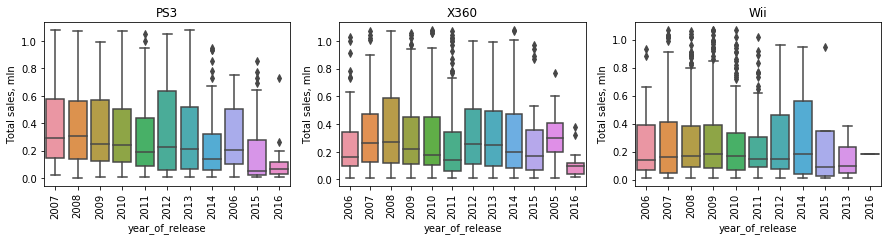

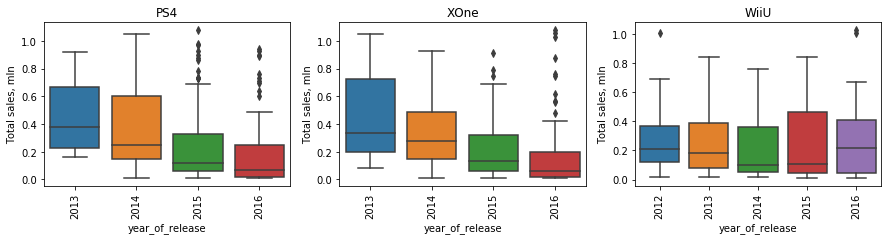

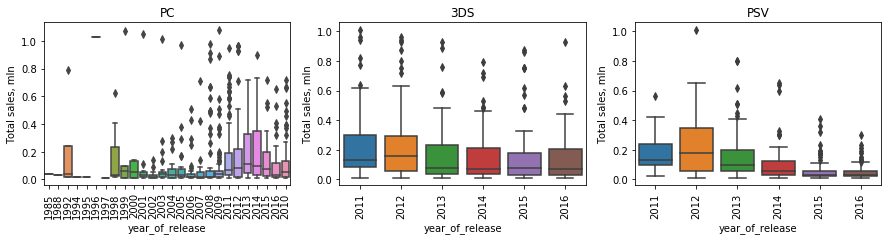

In [27]:
#Let's look at distribution of number of games and sales for actual platforms by years
actual_platforms = {'old versions': ['PS3', 'X360', 'Wii'],
                    'new versions': ['PS4', 'XOne', 'WiiU'],
                    'PC and portable': ['PC', '3DS', 'PSV']}

#function to plot histograms of features by years in one line
def hist_platform_info_by_years_in_row(data, platforms, func, ylabel, sharey=True):
    cols_num=len(platforms)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3), sharey=sharey)
    for i, platform_name in enumerate(platforms):
        data[data.platform==platform_name].groupby('year_of_release')['total_sales'].agg(func)\
            .plot(kind='bar', ax=axes[i]);
        axes[i].set_title(platform_name)
        axes[i].set_ylabel(ylabel)
        axes[i].grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
    plt.show()

#function to plot boxplots of features by years in one line
def boxplot_platform_features_by_years_in_row(data, platforms, feature, ylabel, ylims=None):
    cols_num=len(platforms)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, platform_name in enumerate(platforms):
        sns.boxplot(x='year_of_release', y=feature, data=data[data.platform==platform_name], ax=axes[i])
        axes[i].set_ylim(ylims)
        axes[i].xaxis.set_tick_params(rotation=90)
        axes[i].set_title(platform_name)
        axes[i].set_ylabel(ylabel)
    plt.show()

#plotting of histograms of number of games by release year for each actual platform
print(BOLD + 'Histograms of number of games by release year for each actual platform:'  + END)
for name in actual_platforms.keys():
    hist_platform_info_by_years_in_row(games_data, actual_platforms[name], 'count', 'Number of games')

#plotting of boxplots of total sales of games by release year for each actual platform
print(BOLD + 'Boxblots of total sales of games (without bestsellers) by release year:'  + END)
print(BOLD + 'Rem: '+ END + 'Eliminate the bessellers to look at the distribution of sales for the average game')
for name in actual_platforms.keys():
    boxplot_platform_features_by_years_in_row(games_data[games_data.huge_total_sales==False],
                                           actual_platforms[name], 'total_sales', 'Total sales, mln')

*Already before the release of the new version of the console, the number of games released begins to decline (see the histograms of the number of games for PS2, X360, Wii, the year of release of the new platform can be seen on the histograms for PS3, XOne and WiiU, respectively).*

*The distribution of games released for the PlayStation 2 and the Xbox 360 is approximately the same. For the Nintendo Wii, more games were released until 2011.*

*When new console the PlayStation 3, the Playstation 4, the Xbox 360, the Xbox One, or the PlayStation Vita (PSV) appeared, about 20 games were released for them and then the number of games grew. When a new version of the Nintendo 3DS appeared, more than 100 games were released for it, then the number of games released decreased slightly.*

*The number of games released for the PlayStation 3 since the inception of the platform has been growing all the time and by 2016 it is 2 times more than the number of games released for the Xbox One. For the Nintendo Wii U, only a couple of dozen games are released every year.* 

*For the personal computer, the number of games released began to grow strongly in 2000 and ended its growth in 2011. After that, the number of games released dropped sharply to 40-50 games per year, which looks extremely unlikely. Perhaps the dataset has some kind of filters applied to the data.*

*__Sales of games released in different years include a different number of games released__, so the trend for the PC repeats the change in the number of games released, __as well as the fact that the total sales include all sales from the moment the game was released to the current moment__, so we see a downward trend in sales of the PlayStation 4 and the Xbox One.*

*Since sales are cumulative over the lifetime of the game, then __to compare sales on several platforms, it is necessary to consider only the latest data__ and we can start __from 2013__, when the latest versions of the current platforms appeared, and then we will not compare their sales with the cumulative sales of games that have existed for longer.* 

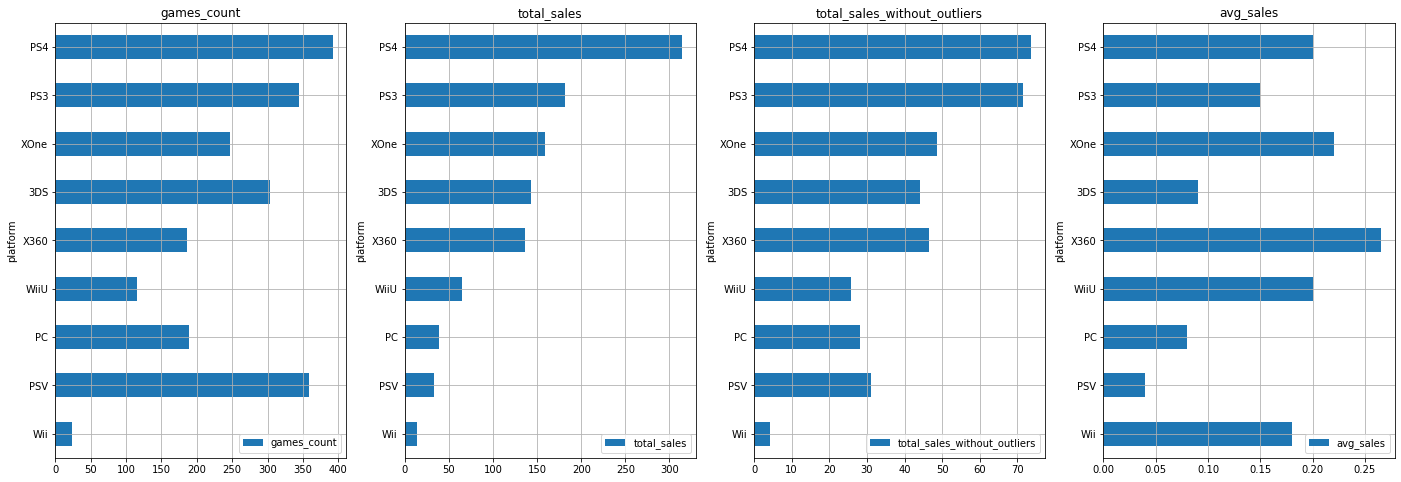

In [28]:
#Let's look at number of games and the total sales for each actual platform for last 4 years
#getting the list of actual platforms
actual_platforms_list = platform_lifetime[platform_lifetime.max_date==2016].index

#calculating table of sales by platforms 
platform_sales_new = get_platform_sales(games_data[games_data.platform.isin(actual_platforms_list)\
                                                  &(games_data.year_of_release>2012)])
platform_sales_new_without_outliers = get_platform_sales(games_data[games_data.platform.isin(actual_platforms_list)\
                                                         &(games_data.year_of_release>2012)\
                                                         &(games_data.huge_total_sales==False)])
platform_sales_new['total_sales_without_outliers'] = platform_sales_new_without_outliers.total_sales

#plotting number of games and the total sales for each actual platform
barplot_in_row(platform_sales_new.sort_values('total_sales'),
               ['games_count', 'total_sales', 'total_sales_without_outliers', 'avg_sales'])

*__In terms of total sales, the PlayStation 4 is the leader__. Bestsellers make a big contribution, without them - sales for the PlayStation 4 and the PlayStation 3 are comparable. __The total sales of the PlayStation 3, the Xbox One, the Nintendo 3DS and the Xbox 360 are comparable__, if you remove the bessellers, then PlayStation 3 takes the lead among them. Both versions of the Nintendo Wii, as well as the PC and the PlayStation Vita (PSV), are lagging far behind them, although a large number of games have been released for the PSV, the average sales are quite low. Note that the median is considered as the average sales due to the presence of outliers.*

Boxblots of total sales for actual platforms by release year:


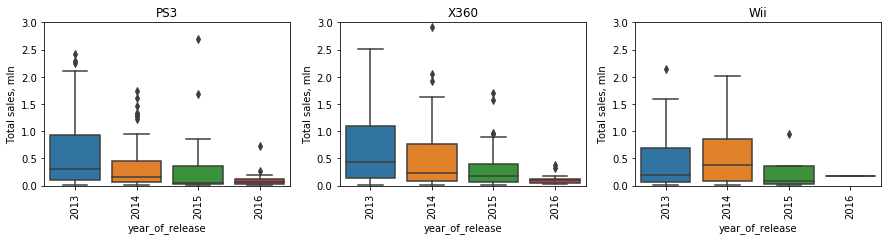

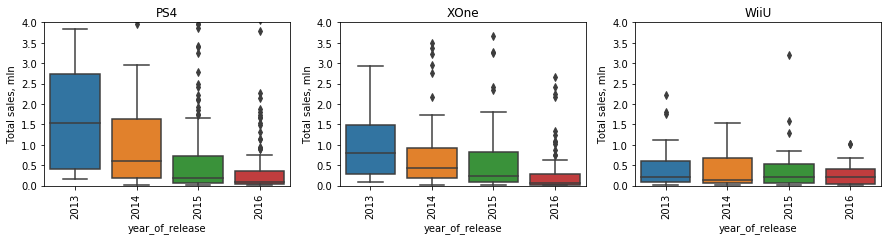

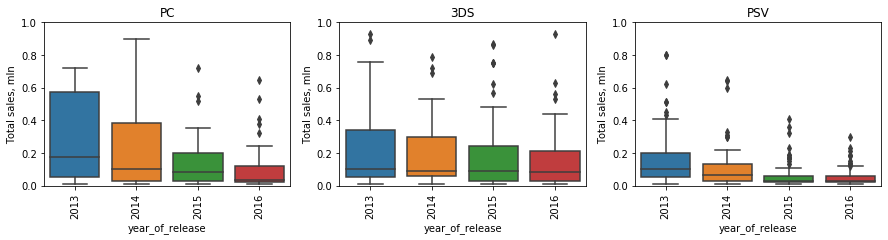

In [29]:
#Let's look at dynamics of changes in sales over the last 4 years
#plotting of boxplots of total sales of games by release year for each actual platform
print(BOLD + 'Boxblots of total sales for actual platforms by release year:'  + END)
for name, lims in zip(actual_platforms.keys(), [(0, 3), (0, 4), (0, 1)]):
    boxplot_platform_features_by_years_in_row(games_data[games_data.year_of_release>2012],
                                              actual_platforms[name], 'total_sales', 'Total sales, mln',
                                              lims)

*It looks like sales for all current platforms except for both versions of the Nintendo Wii for each next release year are less than the previous one. But the total sales volume includes all sales from the moment the game was released until the current moment, so in order to assess the dynamics of changes in sales, __it is necessary to normalize them to the lifetime of the game__.*

Boxblots of total sales normalized for the game lifetime:


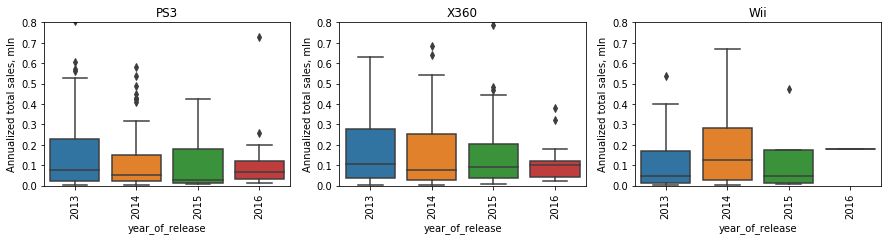

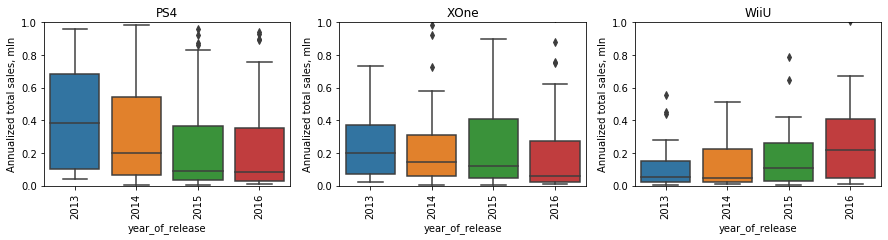

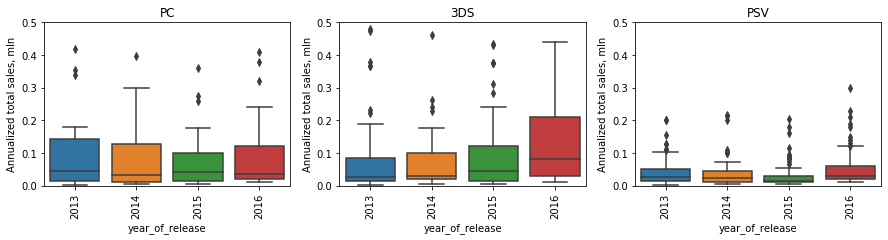

In [30]:
#Let's normalize sales for the lifetime of the game
#calculating the age of the game
games_data['game_age'] = games_data.merge(platform_lifetime.reset_index(), on=['platform'], how='left').max_date\
                             - games_data.year_of_release + 1

#plotting of boxplots of annual total sales of games by release year for each actual platform
print(BOLD + 'Boxblots of total sales normalized for the game lifetime:'  + END)
for name, lims in zip(actual_platforms.keys(), [(0, 0.8), (0, 1), (0, 0.5)]):
    boxplot_platform_features_by_years_in_row(games_data.assign(annual_sales=games_data.total_sales\
                                                                                /(games_data.game_age))\
                                                  [games_data.year_of_release>2012],
                                              actual_platforms[name], 'annual_sales',
                                              'Annualized total sales, mln', lims)

*The __annualized sales for__ handheld consoles __the Nintendo 3DS and the PlayStation Vita (PSV)__, as well as for __the Nintendo Wii U are growing__, while __for the PlayStation 4 and the Xbox One there is still a downtrend__.*

Boxblots of total sales by platforms:
Rem:To consider the distribution of sales, it is necessary to normalize sales over the lifetime of the games


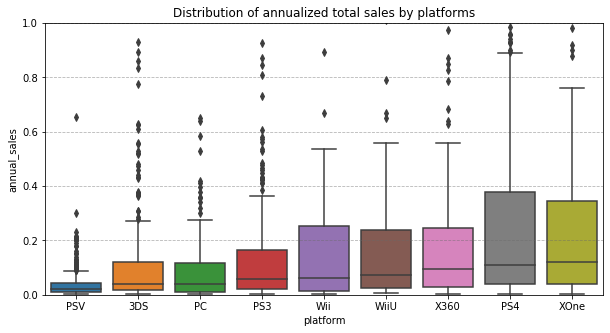

In [31]:
#Let's look at the global sales of all games, broken down by platform
#function to plot boxplot of sales by platforms
def boxplot_sales_by_platforms(data, sales, lims=(0, 1), ax=None, title=None):
    if ax is None: 
        fig, ax = plt.subplots(figsize=(10, 5));
    sns.boxplot(x='platform', y=sales, ax=ax,
                data=data[data.platform.isin(data[data[sales]>0].groupby('platform').name.count().reset_index()\
                                                #there should be enough data
                                                .query('name>20').platform.values)],\
                order=data.groupby('platform')[sales].median().sort_values().reset_index().platform)
    ax.set_title(title);
    ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
    ax.set_ylim(lims);
  
print(BOLD + 'Boxblots of total sales by platforms:' + END)
print(BOLD + 'Rem:' + END\
    + 'To consider the distribution of sales, it is necessary to normalize sales over the lifetime of the games')
boxplot_sales_by_platforms(games_data.assign(annual_sales=games_data.total_sales/games_data.game_age)\
                              [games_data.platform.isin(actual_platforms_list)\
                               &(games_data.year_of_release>2012)],
                           'annual_sales', title='Distribution of annualized total sales by platforms')

*__There are differences in the average sales volume for different platforms__. For portable game consoles the PlayStation Vita (PSV) and the Nintendo 3DS, the average sales are the lowest, for __the latest versions of the PlayStation and the Xbox consoles they are the highest__. Note that the median is considered as the average sales due to the presence of outliers.*

Boxblots of sales by platforms for each market:


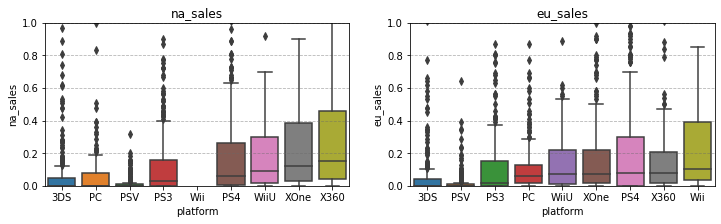

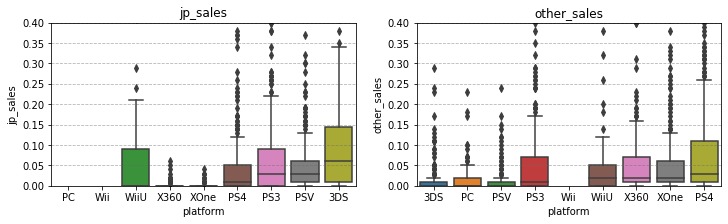

In [32]:
#Let's look at the sales of all games, broken down by platform for each markets
#function to plot boxplots of sales by platforms for different markets in line
def boxplot_sales_by_platforms_in_row(market_sales, lims):
    cols_num=len(market_sales)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 3))
    for i, market in enumerate(market_sales):
        boxplot_sales_by_platforms(games_data.assign(annual_sales=games_data[market]/games_data.game_age)\
                                          [games_data.platform.isin(actual_platforms_list)\
                                          &(games_data.year_of_release>2012)],
                                   market, lims, ax=axes[i])
        axes[i].set_title(market)
    plt.show()

#plotting boxplots of sales by platforms for different markets
print(BOLD + 'Boxblots of sales by platforms for each market:' + END)
for market_sales, lims in zip([['na_sales', 'eu_sales'], ['jp_sales', 'other_sales']], [(0, 1), (0, 0.4)]):
    boxplot_sales_by_platforms_in_row(market_sales, lims)

*__Different markets have their own sales leaders among consoles__. Thus, for the North American market, sales of games on both versions of the Xbox are on average higher, but the lowest on portable consoles the Nintendo 3DS, the PlayStation Vita (PSV) and on PCs. In the European market, the Nintendo Wii is the leader, and handheld consoles also have low sales. For the Japanese market, sales of games on both handheld consoles are very high, as well as for both versions of the PlayStation consoles, while for other platforms they are quite low. For the rest of the markets, sales of games at PlayStation 4 are on average higher and lower for handheld consoles and PCs.*

### Impact of user and professional reviews on sales

Scaterplots of 'total sales' and 'critic_score' by actual platforms:
Rem:We consider all historical data for platforms as most of the scores have been since 2000


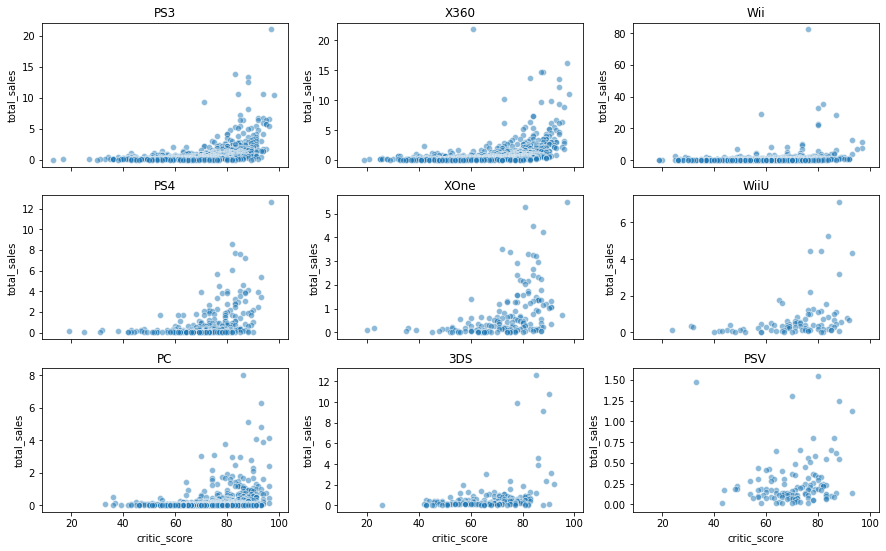

Heatmap for correlation matrix of market sales and 'critic_score' for all platforms with enough data:


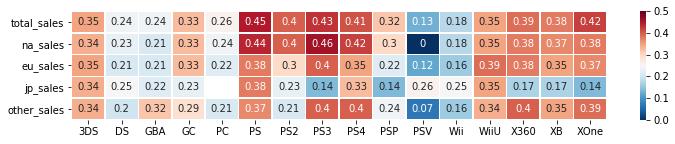

Scaterplots of 'total sales' and 'user_score' by actual platforms:
Rem:We consider all historical data for platforms as most of the scores have been since 2000


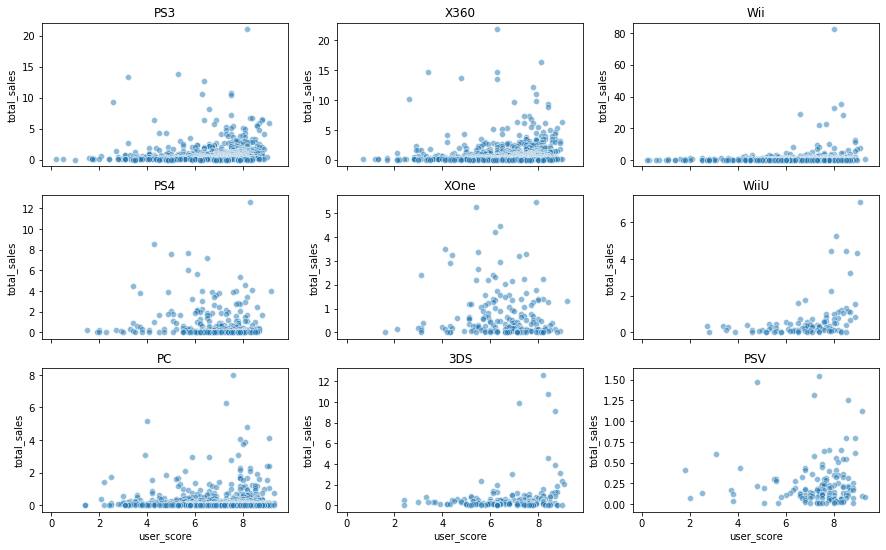

Heatmap for correlation matrix of market sales and 'user_score' for all platforms with enough data:


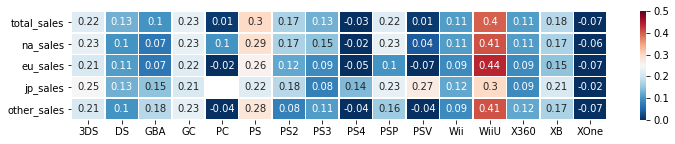

In [33]:
#Let's look at how user and professional reviews affect sales
#function to plot scaterplot of sales and scores by platforms
def scatterplot_by_platforms(data, feature, sales):
    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(5*3, 3*3), sharex=True)
    for i, consols in enumerate(actual_platforms.keys()):
        for j, platform in enumerate(actual_platforms[consols]):
            sns.scatterplot(data=data[(data.platform==platform)&(data[sales]!=0)], 
                            x=feature, y=sales, alpha=0.5, ax=axes[i, j]);
            axes[i, j].set_title(platform)
    plt.show()

#function to calculate correlation matrix between different market sales and scores by platforms
def corr_matrix(data, platforms, market_sales, feature, with_bestsellers):
    if with_bestsellers:
        return pd.DataFrame({platform: [round(data[(data.platform==platform)&(data[sales]!=0)]\
                                              [[feature, sales]].corr().iloc[0, 1], 2) \
                                                  for sales in market_sales]
                                       for platform in platforms}, index=market_sales)
    else:
        return pd.DataFrame({platform: [round(data[(data.platform==platform)&(data[sales]!=0)\
                                                   &(data['huge_'+sales]==False)]\
                                              [[feature, sales]].corr().iloc[0, 1], 2) \
                                                  for sales in market_sales]
                                       for platform in platforms}, index=market_sales)

#function to plot heatmap for correlation matrix
def heatmap(data, feature, sales, with_bestsellers=True):
    fig, ax = plt.subplots(figsize=(12,2)) 
    sns.heatmap(corr_matrix(data,
                            data.pivot_table(index='platform', values=feature, aggfunc='count')\
                                #there should be enough data
                                .query(feature + '>50').index,
                            sales, feature, with_bestsellers),
                annot=True, linewidths=.5, vmin=0, vmax=0.5, cmap='RdBu_r', ax=ax);
    plt.show()

#plotting scaterplots and heatmaps for correlation matrix for both scores
for feature in ['critic_score', 'user_score']:
    print(BOLD + "Scaterplots of 'total sales' and '" + feature + "' by actual platforms:" + END)
    print(BOLD + 'Rem:'+ END
              + 'We consider all historical data for platforms as most of the scores have been since 2000')
    scatterplot_by_platforms(games_data, feature, 'total_sales')
    print(BOLD + "Heatmap for correlation matrix of market sales and '" + feature 
              + "' for all platforms with enough data:" + END)
    heatmap(games_data, feature, ['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

*__Total sales are positively correlated with critic scores for many platforms__ such as the PlayStations (all versions except portable one), the Xboxs (all versions) and the Nintendo 3DS and Wii U. Correlation is not high for all markets, for instance, for Japan in the case of later PlayStation models and for all over the Xbox versions. The PlayStation has the highest correlation in the US market, and for the Nintendo Wii U it is in the European market. In scatterplots, we see __how far the bestsellers are from the bulk of the points__, and they are concentrated in the area of high scores from critics. Apparently, to be a bestseller it is important to have a high critic score, or maybe critics choose games for review among the most sold, but there are very few bestsellers with low critical scores. The bestsellers can bias the correlation estimates.*

*__For user scores, there is a positive correlation only for the Nintendo Wii U platform and slightly lower for the first version of the PlayStation.__ In the scatterplots, we also see that the bestsellers are far from the main mass of dots, but they are not all concentrated in the area of high user scores for most platforms.*

Scaterplots of 'total sales' and 'critic_score' by actual platforms without bestsellsers:
Rem:We consider all historical data for platforms as most of the scores have been since 2000


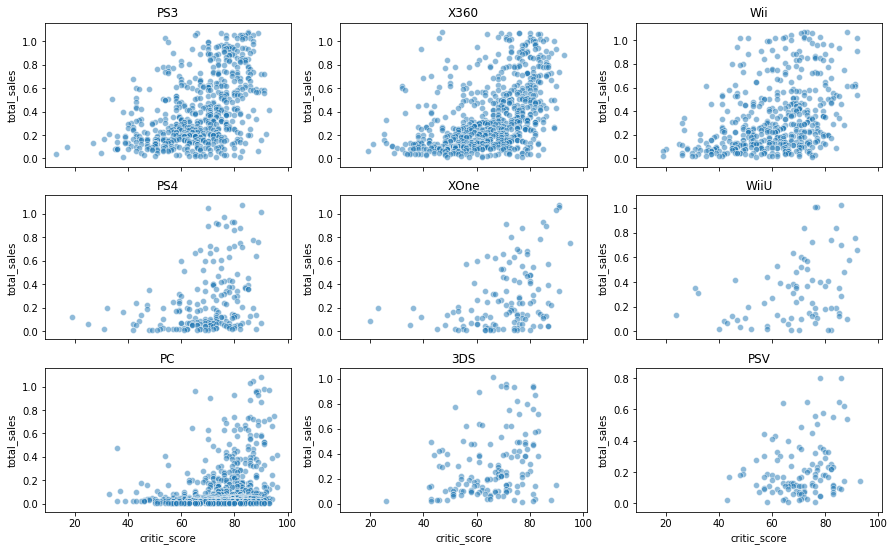

Heatmap for correlation matrix of market sales and 'critic_score' for all platforms without bestsellers:


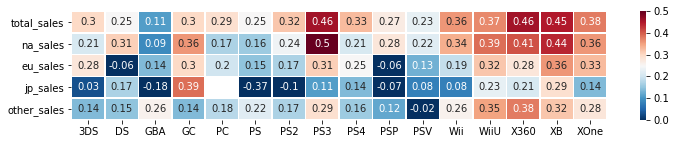

Scaterplots of 'total sales' and 'user_score' by actual platforms without bestsellsers:
Rem:We consider all historical data for platforms as most of the scores have been since 2000


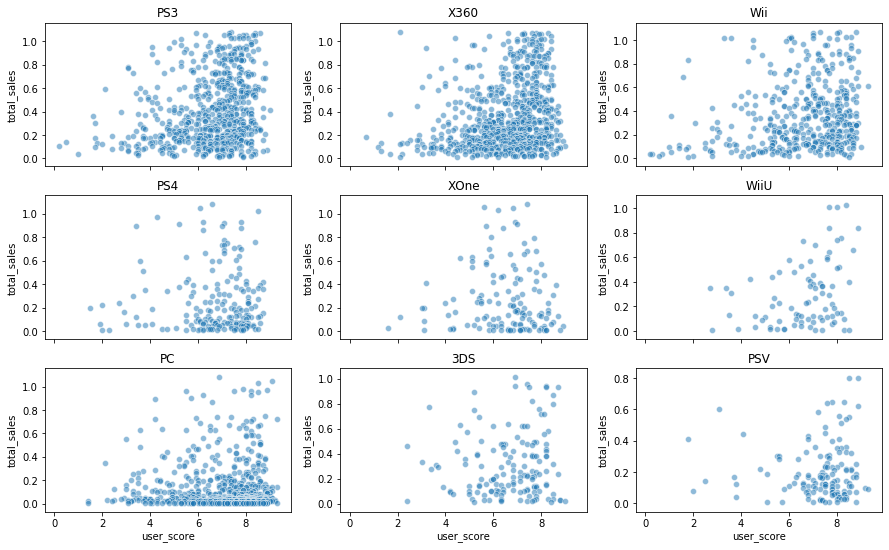

Heatmap for correlation matrix of market sales and 'user_score' for all platforms without bestsellers:


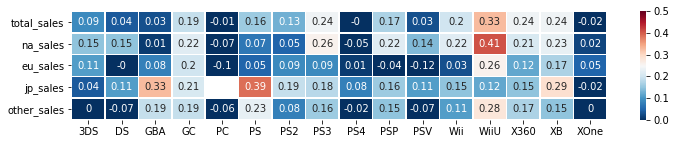

In [34]:
#Let's look at correlations without bestsellers
#plotting scaterplots and heatmaps for correlation matrix for both scores without bestsellers
for feature in ['critic_score', 'user_score']:
    print(BOLD + "Scaterplots of 'total sales' and '" + feature + "' by actual platforms without bestsellsers:" + END)
    print(BOLD + 'Rem:'+ END
              + 'We consider all historical data for platforms as most of the scores have been since 2000')
    scatterplot_by_platforms(games_data[games_data['huge_total_sales']==False], feature, 'total_sales')
    print(BOLD + "Heatmap for correlation matrix of market sales and '" + feature 
              + "' for all platforms without bestsellers:" + END)
    heatmap(games_data, feature, ['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], False)

*After removing the bestsellers, a positive correlation with critic scores remained for all versions of the Xbox (again, except for the Japanese market), for the Nintendo Wii U and for the 3rd version of the PlayStation, and increased for the Nintendo Game Cube (GC) in the Japanese and North American markets. Note that there could also be low sales for relatively high critical scores, but a low score corresponds to a low sales level.*

*After removing the bestsellers, the high correlation with user scores remained only for Nintendo Wii U in the North American market and increased for the first version of the PlayStation in the Japanese market. Note that there could also be low sales for relatively high user scores for the Nintendo Wii U platform (see corresponding scatterplot).*

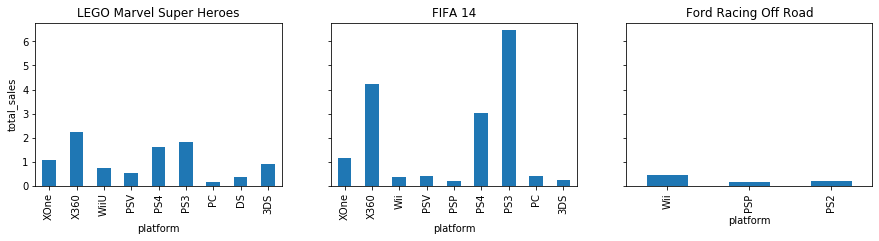

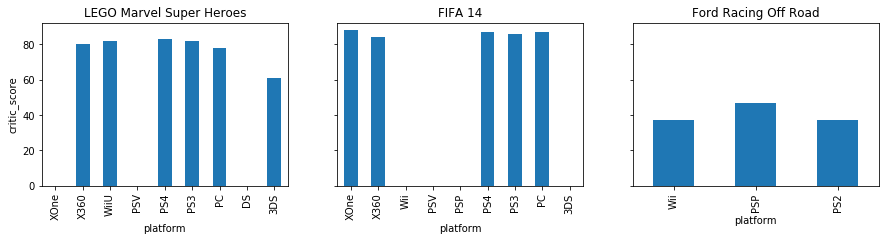

In [35]:
#Let's look at couple of games, their sales and critics scores on different platforms
#function to plot barplots for feature for particular games and different platforms
def game_feature_by_platforms(data, games, feature):
    cols_num=len(games)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3), sharey=True)
    for i, game in enumerate(games):
        data[data.name==game].sort_values('platform', ascending=False)\
            .plot(x='platform', y=feature, kind='bar', ax=axes[i]);
        axes[i].set_title(game)
        axes[i].set_ylabel(feature)
        axes[i].get_legend().remove()

#plotting barplots fot 'total_sales' and 'critic_score' for particular games and different platforms     
for feature in ['total_sales', 'critic_score']:
    game_feature_by_platforms(games_data, ['LEGO Marvel Super Heroes', 'FIFA 14', 'Ford Racing Off Road'],
                              feature)

*Games with high sales tend to have high critic scores, but high critic scores do not always correspond to high sales. Low scores usually correspond to low sales.*

### The general distribution of games by genre

Boxblots of total sales by genres:


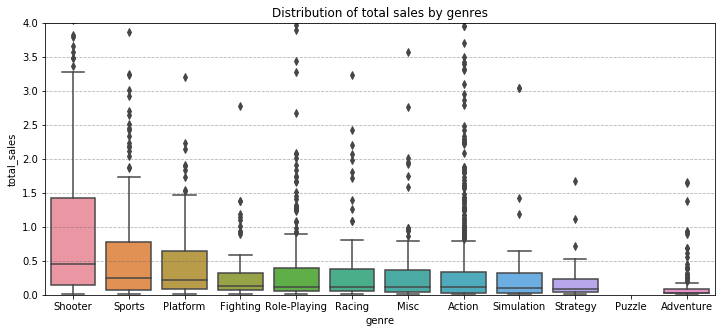

In [36]:
#Let's look at general distribution of total sales of games by genres
#function to plot boxplot of sales by genres
def boxplot_sales_by_genres(data, lims=(0, 4), ax=None, title=None):
    if ax is None: 
        fig, ax = plt.subplots(figsize=(12, 5));
    sns.boxplot(x='genre', y='total_sales', ax=ax, 
                data=data[data.genre.isin(data.groupby('genre').name.count().reset_index()\
                                              #there should be enough data
                                              .query('name>20').genre.values)],\
                order=data.groupby('genre').total_sales.median().sort_values(ascending=False).reset_index().genre)
    ax.set_title(title);
    ax.grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
    ax.set_ylim(lims);

print(BOLD + 'Boxblots of total sales by genres:' + END)
boxplot_sales_by_genres(games_data[(games_data.platform.isin(actual_platforms_list))\
                             &(games_data.year_of_release>2012)],\
                        title='Distribution of total sales by genres')

*__The most profitable genre is Shooter. Sports and Platform games also have high sales, while Strategy and Adventure games have the lowest average sales__. Perhaps for different consoles it will be different. Note that the median is considered as the average sales due to the presence of outliers.*

Boxblots of sales by genres for each actual platform:
Rem:We consider all historical data for actual platforms in order to have enough data in each genre


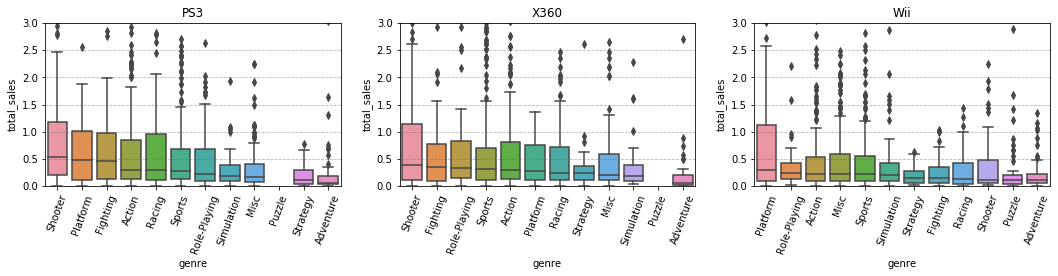

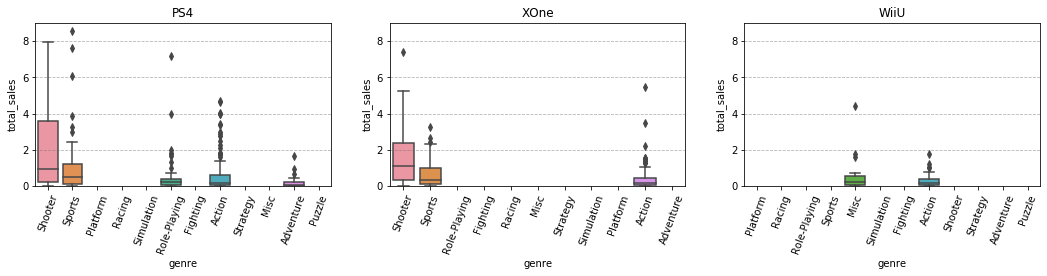

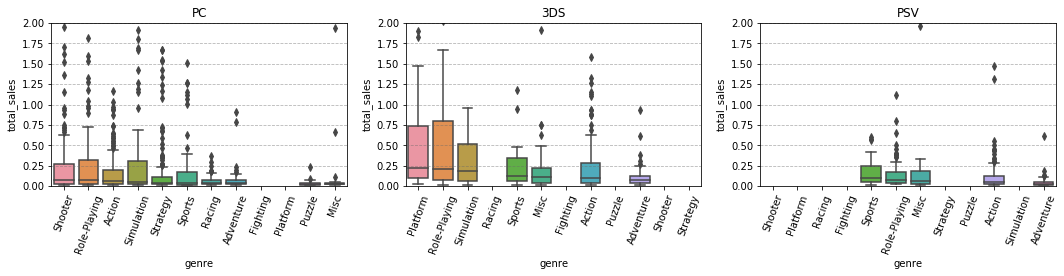

In [37]:
#Let's look at the sales of all games, broken down by platform for each markets
#function to plot boxplots of sales by platforms for different markets in line
def boxplot_sales_by_genres_in_row(platforms, lims):
    cols_num=len(platforms)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 3))
    for i, platform in enumerate(platforms):
        boxplot_sales_by_genres(games_data[games_data.platform==platform],
                                lims, ax=axes[i])
        axes[i].set_title(platform)
        axes[i].xaxis.set_tick_params(rotation=70)
    plt.show()

#plotting boxplots of sales by platforms for different markets
print(BOLD + 'Boxblots of sales by genres for each actual platform:' + END)
print(BOLD + 'Rem:' + END 
      + 'We consider all historical data for actual platforms in order to have enough data in each genre')
for name, lims in zip(actual_platforms.keys(), [(0, 3), (0, 9), (0, 2)]):
    boxplot_sales_by_genres_in_row(actual_platforms[name], lims)

*There is quite a bit of data for different genres for some platforms, apparently due to the limited dateset.
Shooters are also top-selling on many consoles, but for the Nintendo Wii and the Nintendo 3DS, Platform genre is the leader, and sales of Shooter games are below many other genres for the Nintendo Wii. Platform games as well as Fighting games are also among the top sellers on the PlayStation 3. For the Nintendo 3DS, Role-Playing and Simulation games have also taken the lead. Adventure games have the lowest sales across many platforms.*

### Conclusions

__Number of games released in different years__

Before 2000, games were released separately for each platform, after that the same game was released for several platforms at once and the number of games released increases significantly till 2008. After 2012, the number of games released has dropped sharply. This looks odd and worth checking back. Perhaps for preparing the dataset it is used some kind of filters for games.

__Platforms: sales and a lifetime__

According to all historical data, PlayStation 2 is the absolute leader in sales (even if we exclude the bestsellers with huge sales) and in the number of games released for it among all platforms. The leaders also include 2 more versions of PlayStation: PS and PS3, and the Xbox 360 and the Nintendo Wii. The latest versions of these consoles lag far behind in total sales and the number of released games, due to the fact that sales include all sales from the moment the game was released until the current moment.

On average, platforms exist for 7.5 years, after which new games are no longer released for it. The new version of the console comes out in 6 year on average. Already before the release of the new version of the console, the number of games released begins to decline. For the new version of the console, only about 20 games are released in the first year.

If we consider the latest data (from 2013, when all the latest versions of consoles appeared), the PlayStation 4 is the leader in terms of total sales, although bestsellers make a big contribution. The PlayStation 3, the Xbox One, the Nintendo 3DS and the Xbox 360 are next on the list, their sales are comparable.

The annualized (to avoid cumulative effect) sales for handheld consoles the Nintendo 3DS and the PlayStation Vita, as well as for the Nintendo Wii U are growing, while for the PlayStation 4 and the Xbox One there is a downtrend.

There are differences in the average sales for different platforms. For portable game consoles the PlayStation Vita and the Nintendo 3DS, the average sales are the lowest, for the latest versions of the PlayStation and the Xbox consoles they are the highest.

Different markets have their own sales leaders among consoles. Thus, for the Japanese market, average sales of games on both handheld consoles the Nintendo 3DS and the PlayStation Vita are very high, as well as for both versions of the PlayStation consoles, while for other platforms they are quite low. For the rest of the markets, portable consoles sales are very low. Both latest versions of the Xbox are leading in the American market, while in the European market, the Nintendo Wii is the leader.

__Impact of user and professional reviews on sales__

The total sales are positively correlated with critical scores for all versions of the Xbox console, as well as for the latest version of Nintendo Wii U and for the previous version of PlayStation 3. For other versions of Playstation, a high correlation is obtained due to bestsellers with a huge sales, this is also true for portable Nintendo 3DS. Correlation is different for different markets, as there is on the whole no correlation for the Japanese market.
Note that there are low sales for relatively high critical scores for these consoles, but a low score corresponds to a low sales level and the bestsellers are concentrated in the area of high scores from critics. Therefore, it is important not to have low scores from critics.

The sales are positively correlated with user scores only for the Nintendo Wii U in the North American. On other markets for this console correlation is high due to bestsellers with a huge sales. Note that there could also be low sales for relatively high user scores for the Wii U, but the bestsellers are concentrated in the area of high scores from users. Interestingly, that user preferences coincide with the desire to buy games only for this console.

__The general distribution of games by genre__

The most profitable genre is Shooter. Sports, Platform, Fighting, Role-Playing games also have high sales, while Strategy and Adventure games have the lowest average sales. Leaders may differ for different platforms.

## 4. Creating a user profile for each region
<a id='section4'></a>

Market shares by platforms and genres:


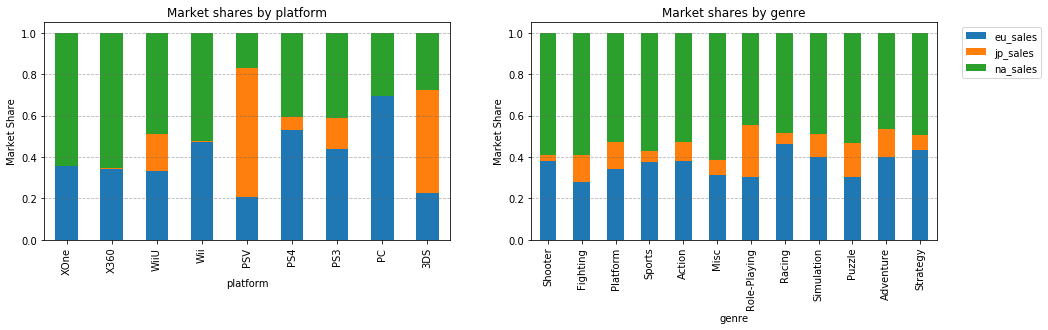

In [38]:
#Let's look at variations in market shares from region to region
#function to calculate market shares for each region
def get_market_shares(data, feature):
    market_sales = data.pivot_table(index=feature,
                                    values=['na_sales', 'eu_sales', 'jp_sales'],
                                    aggfunc='sum')
    total_sales = market_sales.sum(axis=1)
    return round(market_sales.div(total_sales, axis=0), 3)

#function to plot market shares by platforms
def plot_market_share_by_platform(data, ax):
    get_market_shares(data, 'platform').sort_values('platform', ascending=False)\
        .plot(kind='bar', stacked=True, ax=ax);

#function to plot market shares by genres
def plot_market_share_by_genres(data, ax):
    get_market_shares(data, 'genre').join(data.groupby('genre').agg({'total_sales':'median'}))\
        .sort_values('total_sales', ascending=False)[['eu_sales', 'jp_sales', 'na_sales']]\
            .plot(kind='bar', stacked=True, ax=ax);

#plotting market shares by platforms and genres in row
print(BOLD + 'Market shares by platforms and genres:' + END)
fig, axes = plt.subplots(ncols=2, figsize=(8*2, 4))
plot_market_share_by_platform(games_data[(games_data.platform.isin(actual_platforms_list))\
                                         &(games_data.year_of_release>2012)],
                              axes[0])
plot_market_share_by_genres(games_data[games_data.platform.isin(actual_platforms_list)], axes[1])
for i, feature in enumerate(['platform', 'genre']):
    axes[i].set_ylabel('Market Share');
    axes[i].set_title('Market shares by ' + feature);
    axes[i].grid(axis='y', linestyle='--', color='dimgray', alpha=0.5)
axes[0].get_legend().remove()
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left');

*For both versions of the Xbox the largest market share belongs to North America; in Japan, games for these consoles are practically not sold. The largest market share in Europe for the PC. For both versions of the PlayStation the market share in Europe is slightly higher than in North America, and relatively small for Japan. For the Nintendo Wii North America and Europe share the market equally; in Japan, games for these consoles are practically not sold. For the Nintendo Wii U the market share in North America is slightly higher than in Europe. For both versions of portoble consoles the largest market share belongs to Japan, for them North America and Europe share the market roughly equal.*

*For the top 5 genres, the majority of the market is in North America (genres in the barplot are sorted in descending order of average sales). Market share for Japan is uniformly small for all genres except Role-Playing.*

Distribution of sales by rating for each region:
Rem: We consider all historical data for actual platforms as most of the scores have been since 2000.
     Note, we only have enough data for ratings E, M, T, E10+.


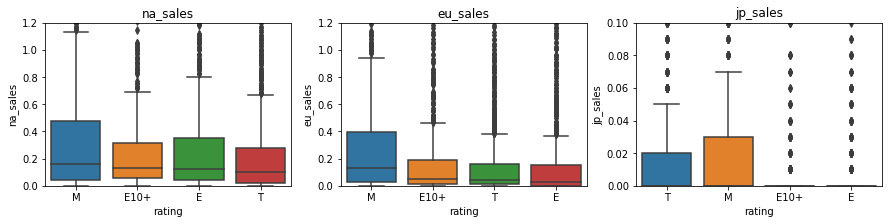

Let's see if we have enough observations for the ratings by regions:


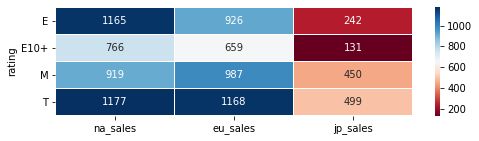

In [39]:
#Let's look if ESRB ratings affect sales in individual regions
#function to plot boxplot of sales by ratings for different regions
def plot_sales_by_rating(data, sales_features, ylims):
    cols_num=len(sales_features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, feature in enumerate(sales_features):
        sns.boxplot(x='rating', y=feature, ax=axes[i], data=data,
                    order=data.groupby('rating')[feature].median().sort_values(ascending=False)\
                        .reset_index().rating
                   );
        axes[i].set_ylim(ylims[i]);
        axes[i].set_title(feature);
    plt.show()

#ploting boxplot of sales by ratings for different regions
print(BOLD + 'Distribution of sales by rating for each region:' + END)
print(BOLD + 'Rem: ' + END 
      + 'We consider all historical data for actual platforms as most of the scores have been since 2000.')
print('     Note, we only have enough data for ratings E, M, T, E10+.')
plot_sales_by_rating(games_data[(games_data.platform.isin(actual_platforms_list))\
                             &(games_data.rating.isin(['E', 'M', 'T', 'E10+']))],
                     ['na_sales', 'eu_sales', 'jp_sales'], [(0, 1.2), (0, 1.2), (0, 0.1)])

#function to calculate the number of observation for each groups under consideration
def get_observation_number(data):
    return pd.DataFrame({sales_feature: data[data[sales_feature]>0].groupby('rating')[sales_feature].count() 
                             for sales_feature in ['na_sales', 'eu_sales', 'jp_sales']})
 
#plotting heatmap for the number of observation for each groups under consideration
print(BOLD + "Let's see if we have enough observations for the ratings by regions:" + END)
fig, ax = plt.subplots(figsize=(8, 2)) 
sns.heatmap(get_observation_number(games_data[(games_data.platform.isin(actual_platforms_list))\
                                  &(games_data.rating.isin(['E', 'M', 'T', 'E10+']))]),
             annot=True, linewidths=.5, cmap='RdBu', fmt='g', ax=ax);

*On average, sales for different ratings differ only __for the European region: sales for M rating are slightly higher__. There is enough data for each rating, even for the Japan region, if we consider all the historical data for the actual platforms.*

### Conclusions

For different platforms, market shares in different countries are different. Thus, for both versions of portoble consoles the PlayStation Vita and the Nintendo 3DS the largest market share belongs to Japan, games for the other consoles are practically not sold in Japan. For both versions of the Xbox the largest market share belongs to North America and North America has a slightly higher share of sales compared to Europe for the latest console the Nintendo Wii U. Europe has a slightly higher share of sales compared to North America for the both latest consoles the PlayStation. For the Nintendo Wii North America and Europe share the market equally.

For the top 5 genres, the majority of the market is in North America. Market share for Japan is uniformly small for all genres except Role-Playing.

On average, sales for different ratings differ only for the European region: sales for Adults (Mature) rating are slightly higher. 

## 5. Testing the hypotheses
<a id='section5'></a>

### Average user ratings of the Xbox One and PC platforms are the same.

Desciptive statistics for user scores for the Xbox One and the PC:
PC


,count,min,max,mean,median,std,var
user_score,155.0,1.4,9.3,6.3,6.8,1.7,3.0



XOne


,count,min,max,mean,median,std,var
user_score,182.0,1.6,9.2,6.5,6.8,1.4,1.9



Distribution of user scores for the Xbox One and the PC:


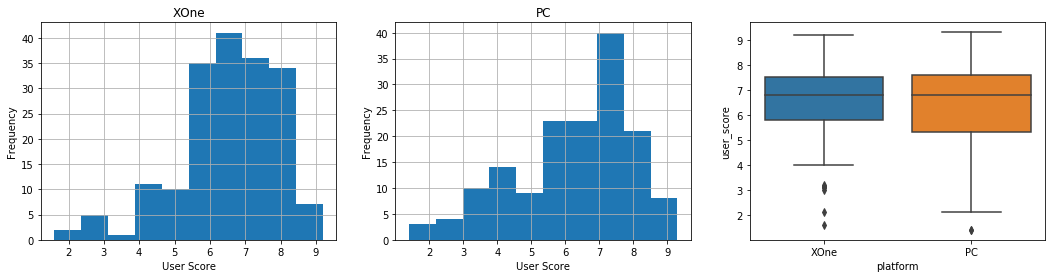

In [40]:
#Let's look at descriptive statictics and distribution of user scores for the Xbox One and the PC 
#function to print the descriptive statistics for user scores for set of values of some feature
def print_user_score_descriptive_statistics(data, feature, values):
    for name, group_data in data[data[feature].isin(values)].groupby(feature):
        print(BOLD + name + END)
        display(group_data[['user_score']].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'var']).round(1).T)
        print()

#printing the descriptive statistics for user scores for the Xbox One and the PC
print(BOLD + 'Desciptive statistics for user scores for the Xbox One and the PC:' + END)
print_user_score_descriptive_statistics(games_data[games_data.year_of_release>2012], 'platform', ['XOne', 'PC'])

#function to plot histograms and boxplots for user scores for set of values of some feature
def plot_distribution_by_features_values(data, feature, values, bins_num=None):
    cols_num = len(values) + 1
    fig, axes = plt.subplots(ncols=cols_num, figsize=(6*cols_num, 4))
    for i, value in enumerate(values):
        data[data[feature]==value].user_score.hist(ax=axes[i], bins=bins_num)
        axes[i].set_title(value)
        axes[i].set_xlabel('User Score')
        axes[i].set_ylabel('Frequency')
    sns.boxplot(x=feature, y='user_score', data=data[data[feature].isin(values)],\
                ax=axes[cols_num-1]);

print(BOLD + 'Distribution of user scores for the Xbox One and the PC:' + END)
plot_distribution_by_features_values(games_data[games_data.year_of_release>2012], 'platform', ['XOne', 'PC'])

*__The median__ as well as other statistics except variation for user scores for the Xbox and the PC games __are equal__.*

*The distributions of the __user scores random variable__ for both platforms does __not__ have the form of a __normal distribution__.*

Q-Q Plots for user ratings for the Xbox One platform and PC:


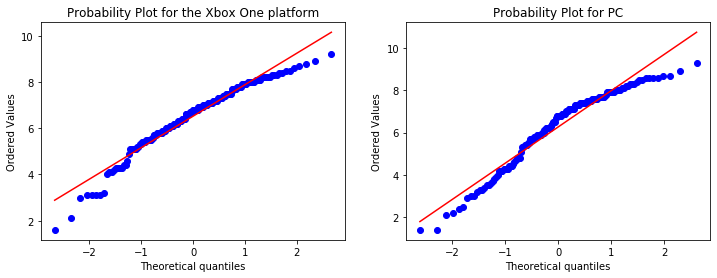

Shapiro-Wilk normality tests:
Hypotheses:
H₀: User ratings for the Xbox One platform is distributed normally
H₁: User ratings for the Xbox One platform is not distributed normally
Shapiro-Wilk normality test, p-value:  1.524856543255737e-05
We reject the hypothesis H₀

Hypotheses:
H₀: User ratings for PC is distributed normally
H₁: User ratings for PC is not distributed normally
Shapiro-Wilk normality test, p-value:  5.039790721639292e-06
We reject the hypothesis H₀



In [41]:
#Let's formally test the hypothesis that the distribution of samples is normal
def norm_test(samples, sample_descriptions):
    print(BOLD + 'Q-Q Plots for user ratings for ' + ' and '.join(sample_descriptions) + ':' + END)
    fig, axes = plt.subplots(ncols=2, figsize=(6*2, 4))
    for i, (sample, descr) in enumerate(zip(samples, sample_descriptions)):
        st.probplot(sample.user_score.dropna(), dist="norm", plot=axes[i])
        axes[i].set_title('Probability Plot for ' + descr)
    plt.show()

    #Let's test the hypothesis that the distribution of samples is normal using the Shapiro-Wilk normality test
    print(BOLD + 'Shapiro-Wilk normality tests:' + END)
    alpha = 0.05
    for sample, descr in zip(samples, sample_descriptions):
        print('Hypotheses:')
        print(BOLD + 'H\u2080: User ratings for ' + descr + ' is distributed normally' + END)
        print(BOLD + 'H\u2081: User ratings for ' + descr + ' is not distributed normally' + END)
        norn_pvalue = st.shapiro(sample.user_score.dropna())[1]
        print("Shapiro-Wilk normality test, p-value: ", norn_pvalue)
        if (norn_pvalue < alpha): 
            print("We reject the hypothesis H\u2080") 
        else: 
            print("We can't reject the hypothesis H\u2080") 
        print()

#testing the hypothesis of normality of user scores for the Xbox One and the PC
norm_test([games_data[(games_data.year_of_release>2012)&(games_data.platform=='XOne')],
           games_data[(games_data.year_of_release>2012)&(games_data.platform=='PC')]],
          ['the Xbox One platform', 'PC'])

*The distribution of user scores for both platforms is most likely different from the normal one, since the points on the Q-Q graph do not lie on a straight line, but are described by a non-linear curve.*

*Shapiro-Wilk normality tests also reject the hypothesis  𝐻0  that the distribution of samples is normal.*

*Thus, we can not use a parametric Student's t-test in order to compare the average user scores for the Xbox One and the PC.*

In [42]:
#function to run Mann-Whitney U test for user scores for different samples
def mann_whitneyu_test(sample1, sample2, description):
    print(BOLD + 'Mann-Whitney U test:' + END)
    alpha = 0.05
    print('Hypotheses:')
    print(BOLD + 'H\u2080: Sample distributions of user ratings ' + description + ' are equal.'+ END)
    print(BOLD +'H\u2081: Sample distributions of user ratings ' + description + ' are not equal.' + END)
    pvalue = st.mannwhitneyu(sample1, sample2, alternative='two-sided')[1]
    print("Mann-Whitney U test, p-value: ", pvalue)
    if (pvalue < alpha): 
        print("We reject the hypothesis H\u2080") 
    else: 
        print("We can't reject the hypothesis H\u2080") 

#running Mann-Whitney U test for user scores for the Xbox One and the PC
mann_whitneyu_test(games_data[(games_data.year_of_release>2012)&(games_data.platform=='XOne')].user_score.dropna(),
                   games_data[(games_data.year_of_release>2012)&(games_data.platform=='PC')].user_score.dropna(),
                   'of the Xbox One and PC platforms')

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of user ratings of the Xbox One and PC platforms are equal.
H₁: Sample distributions of user ratings of the Xbox One and PC platforms are not equal.
Mann-Whitney U test, p-value:  0.5011006734622374
We can't reject the hypothesis H₀


*__The Mann-Whitney U test doesn't rejects the null hypothesis about equality of user scores distributions for the Xbox and the PC platforms at a significance level of 0.05__.  Thus, there is likely no difference between the samples.*

### Average user ratings for the Action and Sports genres are different.

Desciptive statistics for user scores for Action and Sport genres:
Action


,count,min,max,mean,median,std,var
user_score,388.0,2.0,9.1,6.8,7.1,1.3,1.8



Sports


,count,min,max,mean,median,std,var
user_score,159.0,0.2,8.8,5.2,5.5,1.8,3.2



Distribution of user scores for Action and Sport genres:


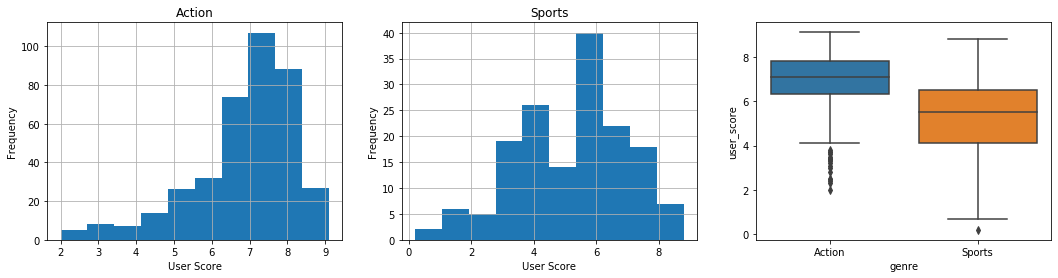

In [43]:
#Let's look at descriptive statictics and distribution of user scores for Action and Sport genres
#printing the descriptive statistics for user scores for Action and Sport genres
print(BOLD + 'Desciptive statistics for user scores for Action and Sport genres:' + END)
print_user_score_descriptive_statistics(games_data[games_data.platform.isin(actual_platforms_list)\
                                                   &(games_data.year_of_release>2012)], 
                                        'genre', ['Action', 'Sports'])

print(BOLD + 'Distribution of user scores for Action and Sport genres:' + END)
plot_distribution_by_features_values(games_data[games_data.platform.isin(actual_platforms_list)\
                                                   &(games_data.year_of_release>2012)],
                                     'genre', ['Action', 'Sports'])

*__The medians__ for user scores for the Action and Sport games __are shifted relative to each other__.*

*The distributions of the __user scores random variable__ for both genres does __not__ have the form of a __normal distribution__.*

Q-Q Plots for user ratings for Action genre and Sports genre:


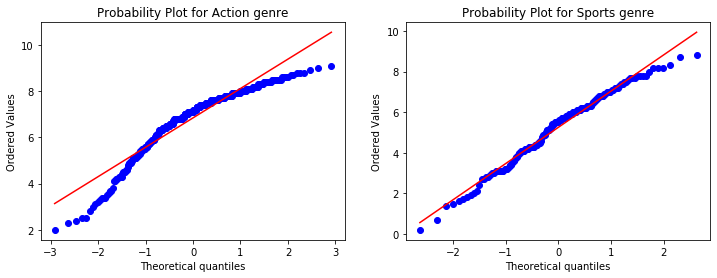

Shapiro-Wilk normality tests:
Hypotheses:
H₀: User ratings for Action genre is distributed normally
H₁: User ratings for Action genre is not distributed normally
Shapiro-Wilk normality test, p-value:  9.09465204697573e-15
We reject the hypothesis H₀

Hypotheses:
H₀: User ratings for Sports genre is distributed normally
H₁: User ratings for Sports genre is not distributed normally
Shapiro-Wilk normality test, p-value:  0.028929850086569786
We reject the hypothesis H₀



In [44]:
#Let's formally test the hypothesis that the distribution of samples is normal
#testing the hypothesis of normality of user scores for Action and Sport genres
norm_test([games_data[games_data.platform.isin(actual_platforms_list)&(games_data.year_of_release>2012)\
                      &(games_data.genre=='Action')],
           games_data[games_data.platform.isin(actual_platforms_list)&(games_data.year_of_release>2012)&\
                      (games_data.genre=='Sports')]],
          ['Action genre', 'Sports genre'])

*The distribution of user scores for both genres is most likely different from the normal one, since the points on the Q-Q graph do not lie on a straight line, but are described by a non-linear curve, although for the Sport genre they are quite close to straight line.*

*Shapiro-Wilk normality tests also reject the hypothesis  𝐻0  that the distribution of samples is normal.*

*Thus, we can not use a parametric Student's t-test in order to compare the average user scores for Action and Sport genres.*

In [45]:
#running Mann-Whitney U test for user scores for Action and Sport genres
mann_whitneyu_test(games_data[games_data.platform.isin(actual_platforms_list)&(games_data.year_of_release>2012)\
                              &(games_data.genre=='Action')].user_score.dropna(),
                   games_data[games_data.platform.isin(actual_platforms_list)&(games_data.year_of_release>2012)\
                              &(games_data.genre=='Sports')].user_score.dropna(),
                   'of the Xbox One and PC platforms')

Mann-Whitney U test:
Hypotheses:
H₀: Sample distributions of user ratings of the Xbox One and PC platforms are equal.
H₁: Sample distributions of user ratings of the Xbox One and PC platforms are not equal.
Mann-Whitney U test, p-value:  2.163238883737244e-23
We reject the hypothesis H₀


*__The Mann-Whitney U test rejects the null hypothesis about equality of user scores distributions for Action and Sport genres__.  Thus, there is likely some difference between the samples. The __median of the user scores Action games is 7.1__. The __median of the user scores is 5.5__. The user rating for Action games is higher than for Sport games in average.*

### Conclusions

The null hypothesis that the average user score of the Xbox One and PC are equal against the two-sided alternative is __not rejected__ at the 5% significance level using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality.

The null hypothesis that the average user score for the Action and Sports genres are equal against the two-sided alternative __is rejected__ at the 5% significance level using a nonparametric rank Mann-Whitney U test. We can not use the Student's t-test due to violation of the assumption of normality. The median of the user scores Action games is 7.1. The median of the user scores is 5.5. The user rating for Action games is higher than for Sport games in average.

## 6. Overall Conclusion
<a id='section6'></a>

There are historical data of the online video game store with user and expert reviews, genres, platforms, and game sales to further assess analyze whether a game succeeds or not on a particular platform or region.

The dataset contains information about almost 17 thousand video games released for 37 years, from 1980 to 2016, in the markets of North America, Europe, Japan and other countries. There are 31 gaming platforms and 12 game genres. 

Before proceeding to the analysis, the data was preprocessed:
* After a general review of the data revealed:
    * unknown values for names and genres for a couple of games
    * misssing values for year of release, critic and user scores, and ESRB ratings
    * there are games with huge sales
    * dublicated game

* Two not actual games with unknown name have been removed.

* The some types were converted to appropriate ones.

* Some of the missing values for the release year have been restored from game name containing the year, other missing values were investigeted 

* The duplicate game has been removed. 

* For further analysis, the total sales over all markets was calculated. To mark the besselers, the corresponding boolean features have been added for each market.


During the analysis, the following patterns were identified:
* The number of games released recently is significantly less than the games released before 2012. It is necessary to check why the list of games is shortened in the data.
* Platforms exist for 7.5 years on average. The new version of the console comes out in 6 years on average. We should not bet on platforms that have existed for more than 6 years. Already before the release of the new version of the console, the number of games released begins to decline and with it sales also begin to decline. It might be a sign.
* Potentially profitable platforms will be:
    * The last version of PlayStation, since this console had the greatest total sales for any generations during the whole history, there are a lot fo games were released for this consol, and last version has the highest average sales.
    * The last version of Xbox, since it has performed well for past generations and the latest version has large average sales.
    * The Nintendo 3DS, since this portable console could be an alternative for home consols, its average sales are growing and it is very popular in some regions
    
    \* Note that markets are characterized by different sales leaders. So, in the European market, the leader in average sales is the Nintendo Wii, in the American market, both versions of Xbox are in the leaders, and for the Japanese market, both portable consoles the Nintendo 3DS and the PlayStation Vita are leaders. Market shares are allocated accordingly.
* Games with high sales tend to have high critic scores, but high critic scores do not always correspond to high sales, despite the positive correlation established for all generations of the Xbox, for the Nintendo Wii U and for the other PlayStation versions. Low scores usually correspond to low sales. Therefore, it is important not to have low scores from critics. To be a bestseller it is important to have a high critic score, or maybe critics choose games for review among the most sold, but there are very few bestsellers with low critical scores.
* The sales are positively correlated with user scores for Nintendo Wii U in the North American and in other markets due to bestsellers. There could also be low sales for relatively high user scores for this console, but the bestsellers are concentrated in the area of high scores from users. It may be worth paying attention to user scores on this console.
* The sales in all markets except Japanese are lower in average for games with missing ESRB ratings or scores. The lack of a rating or scores may be due to the low popularity of the game or rare sales, but in any case, it is better to consider games that have both a rating and scores.
* The most profitable genre is Shooter. Sports, Platform, Fighting, Role-Playing games also have high sales. It makes sense to choose games of these genres. Strategy and Adventure games have the lowest average sales. Better to exclude games of these genres. Note that sales in different genres may vary depending on the region, it should be taken into account.
* The sales for Adults (Mature) rating are slightly higher on average for the European region. In this region, we could give preference to games with this rating.
* The user rating for Action games is higher than for Sport games in average. Perhaps this genre should be preferred. Note that high user ratings can be associated with high sales only on the Nintendo Wii U platform.